<a href="https://colab.research.google.com/github/dsmukti/mukticapstone/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project1_Mukti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **Importing the Dataset**

In [2]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Read the Dataset**

The given dataset was in raw form ,so accordingly we need to give the command to read . here the each cell value is seperated by "semicolon".

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module4/Capstone Project_classification/Bank Marketing Effectiveness Prediction/bank-full.csv",sep=';')

# **Data Sanity checking & Preprocessing**

Before i start the data analysis i would like to check the Data Frame, what all features are there ,if there are many features we can also drop some if necessary,that saves time

In [4]:
print('Number of rows i.e. customers in given dataset is: \033[1m',df.shape[0],'\n\033[0mNumber of columns i.e. features in given dataset is: \033[1m',df.shape[1])

Number of rows i.e. customers in given dataset is:  45211 
Number of columns i.e. features in given dataset is:  17


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


***Duration variable needs to be dropped from the dataset, as the value of the 
variable will only be known after the call is ended & after the call target variable (outcome of the conversation) y will be known. Also, as per problem statement "duration"should only be included for benchmark purpose, this feature is dropped for realistic predictive modelling.***

In [7]:
df=df.drop(['duration'],axis=1)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

### **Check for null values**

Null values if any should be treated else it may mislead the analysis.
We are going to use  *isnull()*

In [10]:
#check for null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

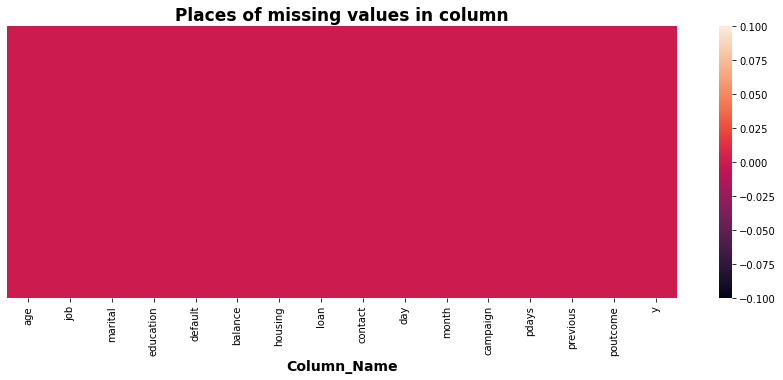

In [11]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

***There is no null value in the given dataset***

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


***Datatype of "day" is showing it as numerical whereas from the given statement and data values, it should be categorical variable, since it indicates day of the month.***

In [13]:
df['day']=df['day'].astype('object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.5+ MB


### **Summary of the dataset**

In [15]:
#restricting the values to display up to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [16]:
#Data summary for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.00,40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,45211.00,1362.27,3044.77,-8019.00,72.00,448.00,1428.00,102127.00
campaign,45211.00,2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,45211.00,40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,45211.00,0.58,2.30,0.00,0.00,0.00,0.00,275.00



1.   Mean & median for age variable is close. For other variables, mean > median, which implies the distribution for these variables is positively skewed, especially balance which is highly skewed. 

2. Max for age is 95, which is surprisingly unrealistic. Might be data error or outlier in the data

3.   pdays seems to be interesting variable here, as minimum value, 25, median & 75 percentile of data values is -1 and max. value of pdays is 871 . However as per problem statement pdays=999 means client was not previously contacted. There is no record with pdays =999, also negative pdays is not possible. Hence, it is assumed that instead of "999", "-1" is used to indicate if client was not contacted previously. This variable pdays needs to be analyzed further in Univariate analysis 
 
4. previous variable also has similar case where minimum, 25, 50 & 75 percentile of data values is 0 with max value being 275, this also needs to be further analyzed in Univariate analysis





In [17]:
#Data summary for categorical variables
df.describe(include=object).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
day,45211,31,20,2752
month,45211,12,may,13766
poutcome,45211,4,unknown,36959


Out of 45,211 data values, 44396 customers are not in default for any credit

In [18]:
# Checking characters in continuous numerical variables & unique values in categorical variables
for i in df:
    print('\033[1m',i,'\033[0m')
    print(df[i].unique())
    print('-'*120)


 age 
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
------------------------------------------------------------------------------------------------------------------------
 job 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------------------------------------------------------------------------------------------------------
 marital 
['married' 'single' 'divorced']
------------------------------------------------------------------------------------------------------------------------
 education 
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------------------------------------------------------------------------------------------------
 default 
['no' 'ye

1.   **High age values seems to be outlier in the dataset**
2.   **Negative pdays value is not possible by definition of variable given in the problem statement, this needs to be further analyzed & treated**
3.   **Values for poutcome is bit different as given in problem statement. 2 values 'other' and 'unknown' can be combined and termed as 'unknown'**




In [19]:
#Standardizing the similar meaning values i.e. correcting the typos
df['poutcome']=df['poutcome'].replace('other', "unknown")

In [20]:
#Checking unique values of all variables
for column in df:
    print('\033[1m',column.upper(),': ',df[column].nunique(),'\033[0m')
    print(df[column].value_counts().sort_values())
    print('\n')

 AGE :  77 
94       1
92       2
93       2
88       2
95       2
      ... 
35    1894
34    1930
33    1972
31    1996
32    2085
Name: age, Length: 77, dtype: int64


 JOB :  12 
unknown           288
student           938
housemaid        1240
unemployed       1303
entrepreneur     1487
self-employed    1579
retired          2264
services         4154
admin.           5171
technician       7597
management       9458
blue-collar      9732
Name: job, dtype: int64


 MARITAL :  3 
divorced     5207
single      12790
married     27214
Name: marital, dtype: int64


 EDUCATION :  4 
unknown       1857
primary       6851
tertiary     13301
secondary    23202
Name: education, dtype: int64


 DEFAULT :  2 
yes      815
no     44396
Name: default, dtype: int64


 BALANCE :  7168 
16353       1
8554        1
18967       1
9531        1
6808        1
         ... 
3         134
4         139
2         156
1         195
0        3514
Name: balance, Length: 7168, dtype: int64


 HOUSING :  2 
n

***pdays & previous variable needs to be processed, as it has very high values for -1 and 0 respectively***

In [21]:
#df.drop('default',axis=1, inplace=True)

### **Preprocessing: Rectifying the missing values (available as -1) for pdays variable**

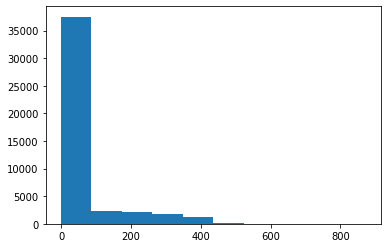

In [22]:
plt.hist(df['pdays'])
plt.show()

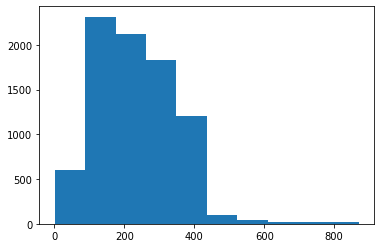

In [23]:
plt.hist(df.loc[df.pdays != -1, 'pdays'])
plt.show()

In [24]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

Without -1, pdays variable looks better distributed. As we can see from the above 2 graphs & value count, the majority of the values for 'pdays' are -1 i.e.missing. This implies majority of the customers this detail is missing. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variable having following values: pdays_missing, pdays_less_200, and pdays_greater_200.

In [25]:
df['pdays_bucket']=''
df['pdays_bucket'][df['pdays']==-1] = 'pdays_missing'
df['pdays_bucket'][(df['pdays']<200) & (df['pdays']>-1)] = 'pdays_less_200'
df['pdays_bucket'][df['pdays']>=200] = 'pdays_greater_200'
df= df.drop('pdays', axis=1);


### **Preprocessing: Rectifying the missing values (available as 0) for 'previous'**

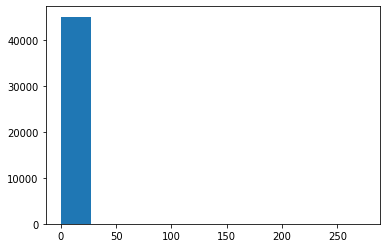

In [26]:
plt.hist(df['previous'])
plt.show()

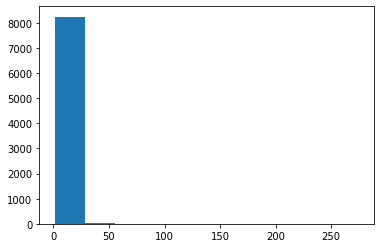

In [27]:
plt.hist(df.loc[df.previous != 0, 'previous'])
plt.show()

In [28]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

To deal with this variable, we removed the numerical variable 'previous' and replaced it with categorical variable having following values: previous_nocall, previous_bet_1_6, and previous_greater_6. Based on above data values for the variable, it is assumed, if more than 6 calls is made for a campaign, then it is high effort, since there are very few customers in the bucket >6

In [29]:
df['previous_bucket']=''
df['previous_bucket'][df['previous']==0] = 'previous_nocall'
df['previous_bucket'][(df['previous']<6) & (df['previous']>=1)] = 'previous_bet_1_6'
df['previous_bucket'][df['previous']>=6] = 'previous_greater_6'
df= df.drop('previous', axis=1);

### **Separating categorical variable and numerical variable for further analysis**

In [30]:
num=['age', 'balance', 'campaign']

cat=['job','marital', 'education','housing','default',
       'loan','contact','day', 'month','poutcome','pdays_bucket','previous_bucket','y']

# **Exploratory Data Analysis:**

In this section we will try to study the variable behaviour using univariate, bivariate & multivariate analysis

## **Univariate Analysis**

### **Univariate Analysis of Numerical variables**

In [31]:
#Creating custom function 'graph' to plot same set of graphs for numerical variables to conduct univariate analysis
def graph(df):
    fig = plt.figure(figsize=(20,4))
    ax1=plt.subplot(1, 3, 1)
    plt.hist(df);
    plt.axvline(df.mean(), color='g', linewidth=1);
    plt.axvline(df.median(), color='b', linestyle='dashed', linewidth=1);
    plt.axvline(df.mode()[0], color='m', linestyle='dashed', linewidth=1);
    ax2=plt.subplot(1, 3, 2)
    sns.distplot(df);
    ax3=plt.subplot(1, 3, 3)
    sns.boxplot(df);

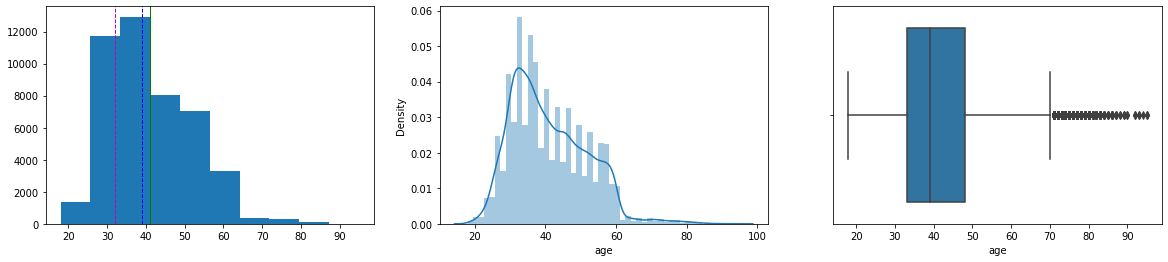

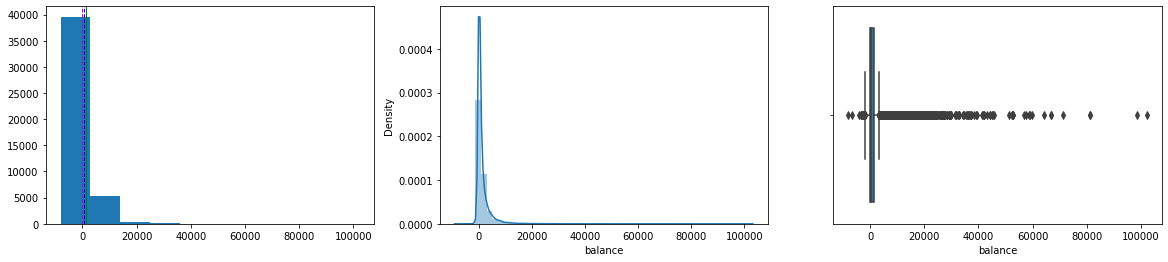

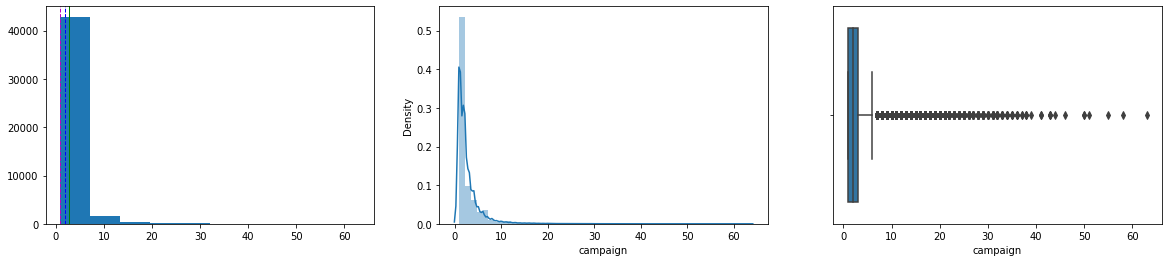

In [32]:
for i in num:
    graph(df[i])
    plt.show();

***Since Numerical variables are at different scales, it is important to scale the variable, else model will try to give more weightage to balance as balance is 10000 scale while age & campaign are in 10. This is executed in later section Variable Transformation***

***All variables has outliers. All variables are right skewed.***

### **Univariate analysis for categorical variables**

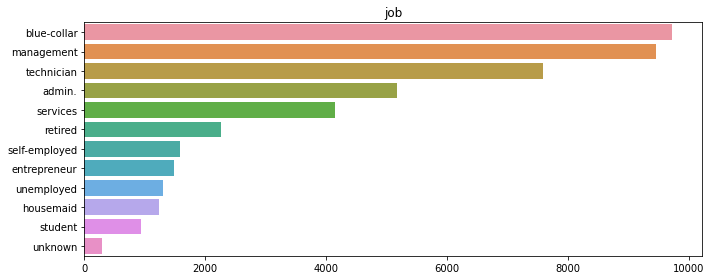

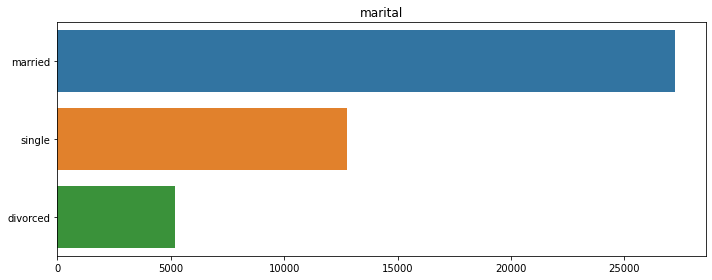

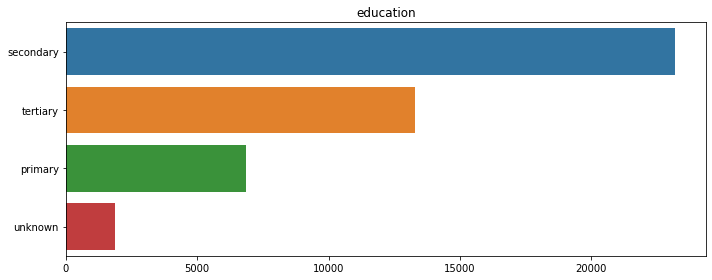

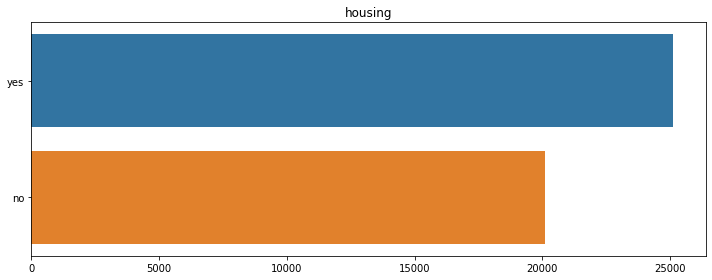

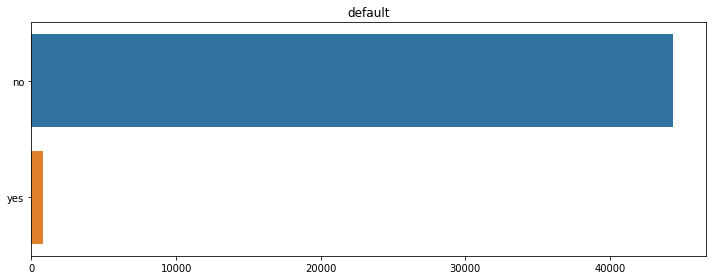

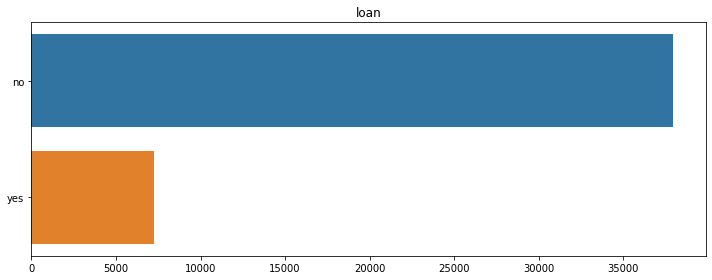

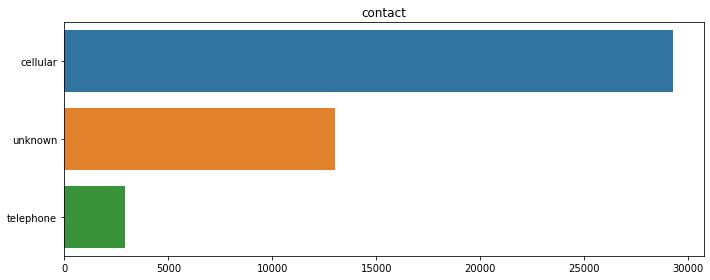

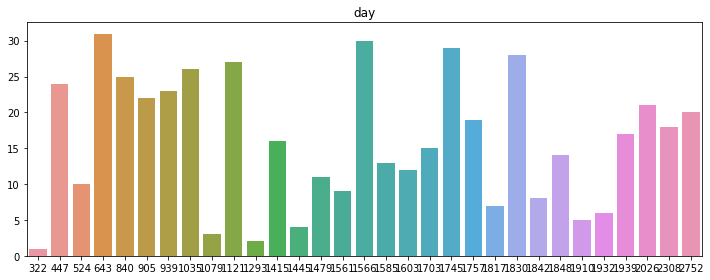

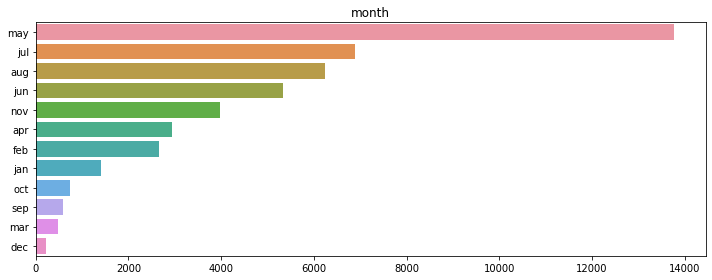

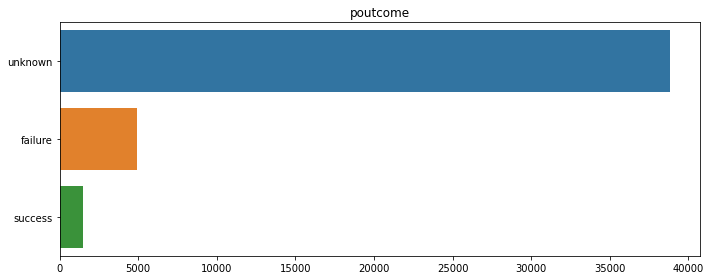

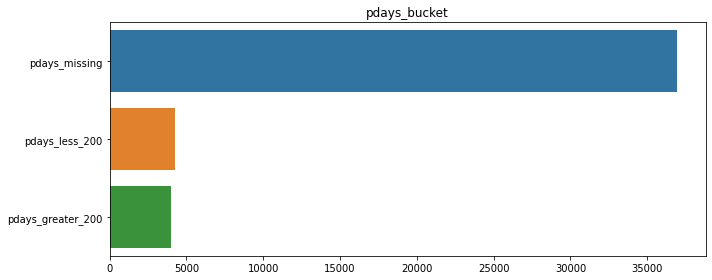

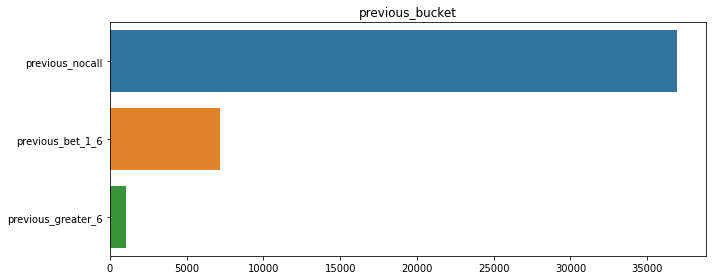

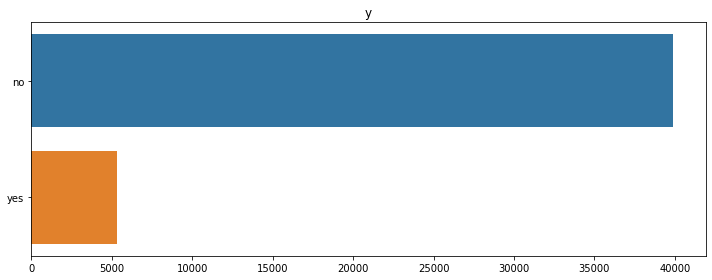

In [33]:
for i in cat:
    plt.figure(figsize=(10,4))
    sns.barplot(df[i].value_counts().values, df[i].value_counts().index)
    plt.title(i)
    plt.tight_layout()

## **Bivariate Analysis**

### **Bivariate analysis for Numerical variables**

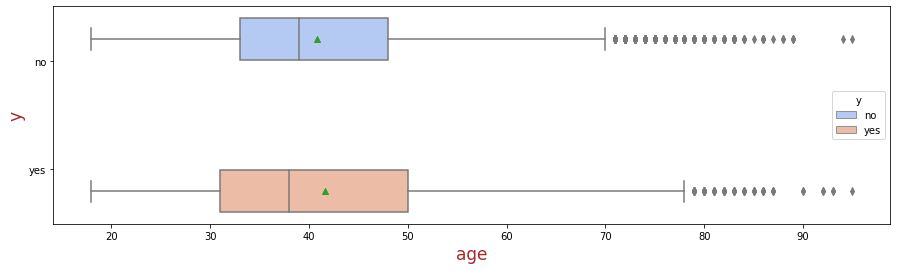

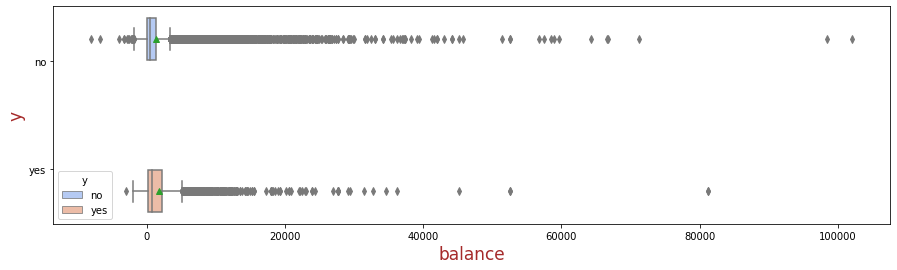

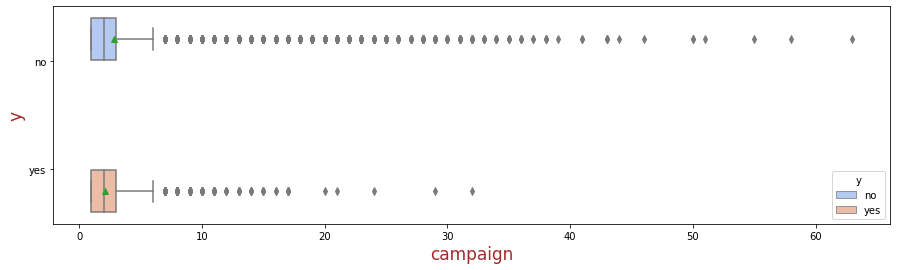

In [34]:
# Box plot
for i in df[num].columns:
    plt.figure(figsize=(15,4))
    plt.xlabel(i,fontsize=17,color='Brown')
    plt.ylabel("y", fontsize=17,color='Brown')
    sns.boxplot(x=df[i],y=df["y"],orient='h',hue=df['y'],palette='coolwarm',showmeans=True);
    plt.show()

### **Bivariate analysis for Categorical variables**

In [35]:
### Charts for categorical columns
def stacked_plot(x):
    ##barplot 
    graph1=sns.countplot(x=column, hue='y', data=df,order=None)
    for p in graph1.patches:
        graph1.annotate('{:.0f}'.format(p.get_height()), 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points',size=15)
    print('-'*120);
    ##stacked chart
    tab = pd.crosstab(x,df['y'],normalize='index');
    graph2=tab.plot(kind='bar',stacked=True,figsize=(12,6));
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    for p in graph2.patches:
        graph2.annotate('{:.0f}'.format(p.get_height()*100), 
                   (p.get_x() + p.get_width()/2, p.get_y()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points',size=15)
    plt.show();

------------------------------------------------------------------------------------------------------------------------


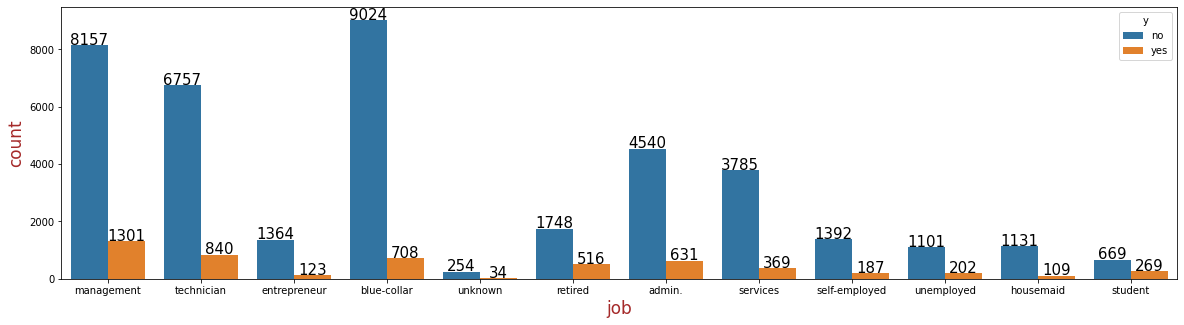

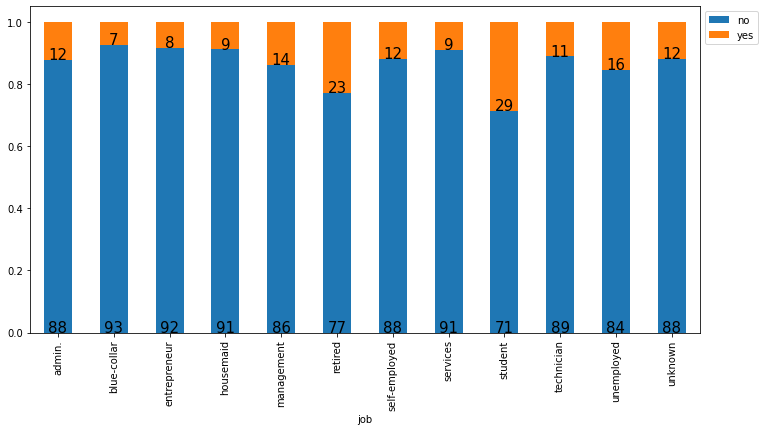

------------------------------------------------------------------------------------------------------------------------


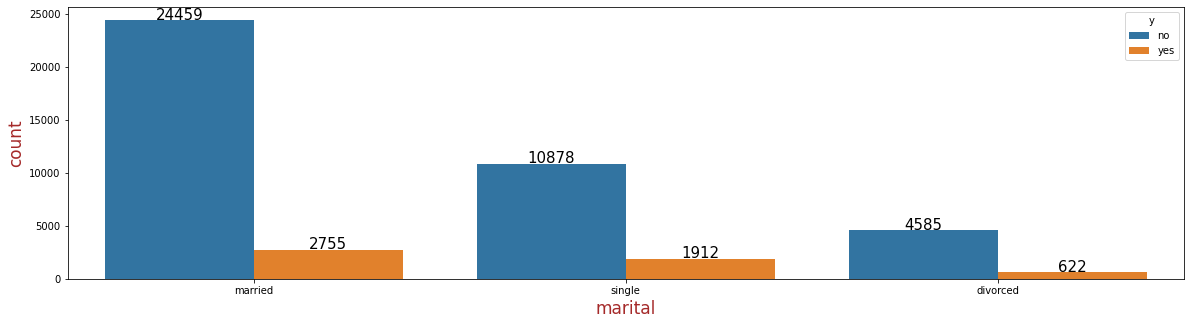

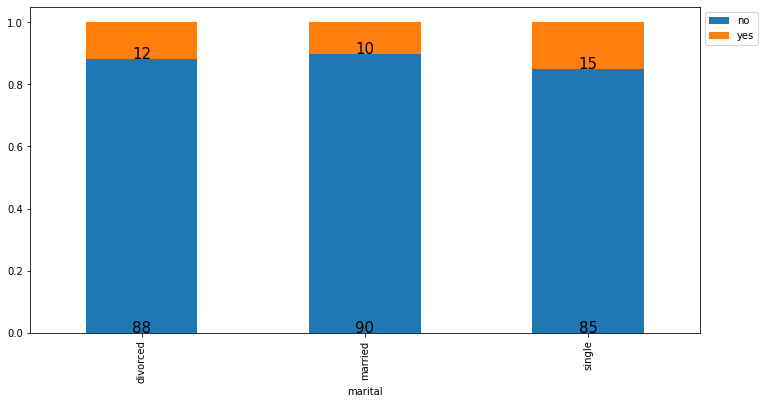

------------------------------------------------------------------------------------------------------------------------


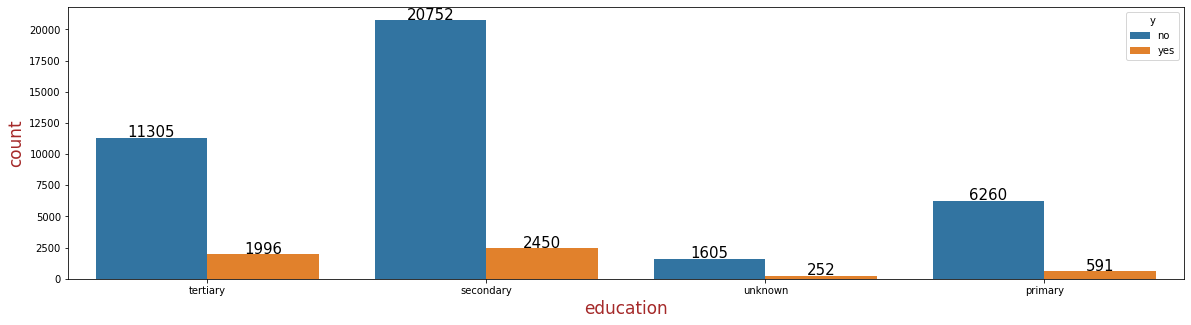

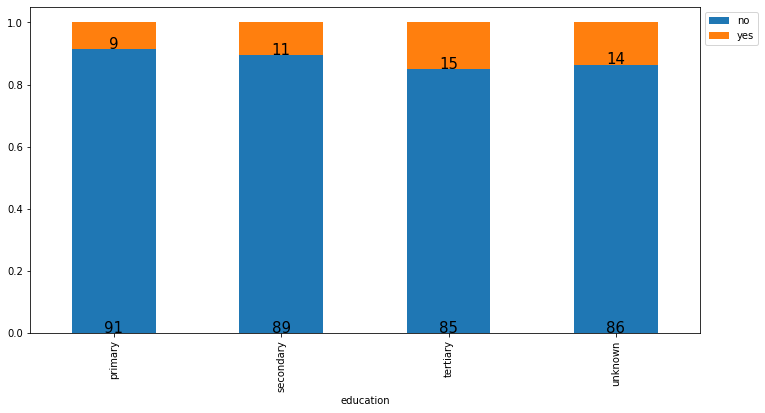

------------------------------------------------------------------------------------------------------------------------


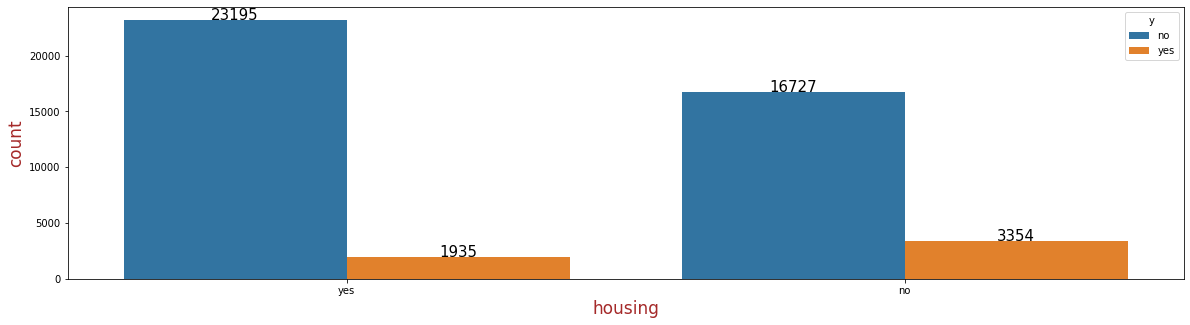

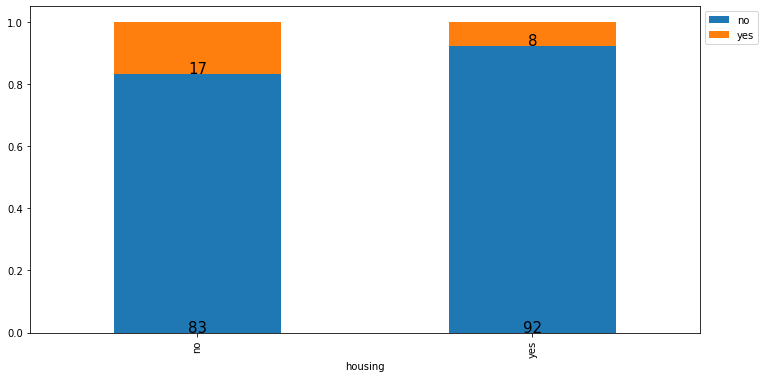

------------------------------------------------------------------------------------------------------------------------


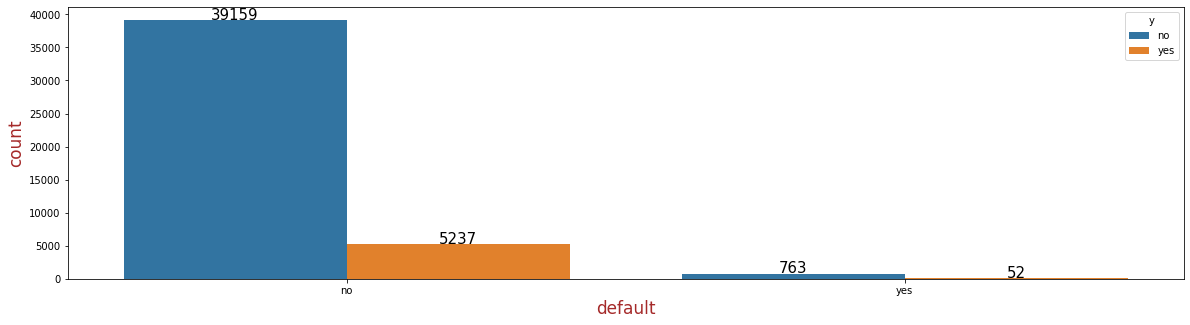

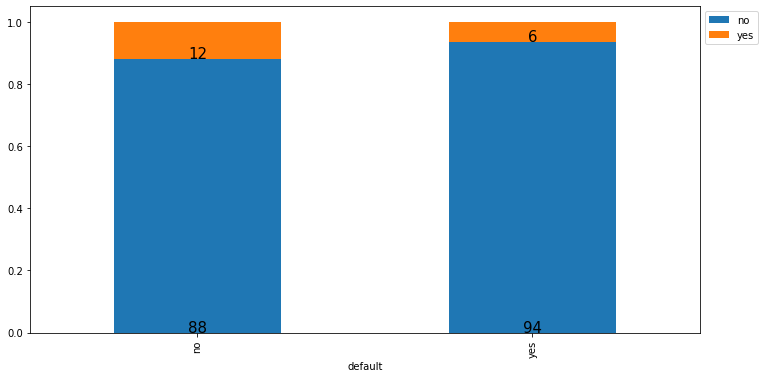

------------------------------------------------------------------------------------------------------------------------


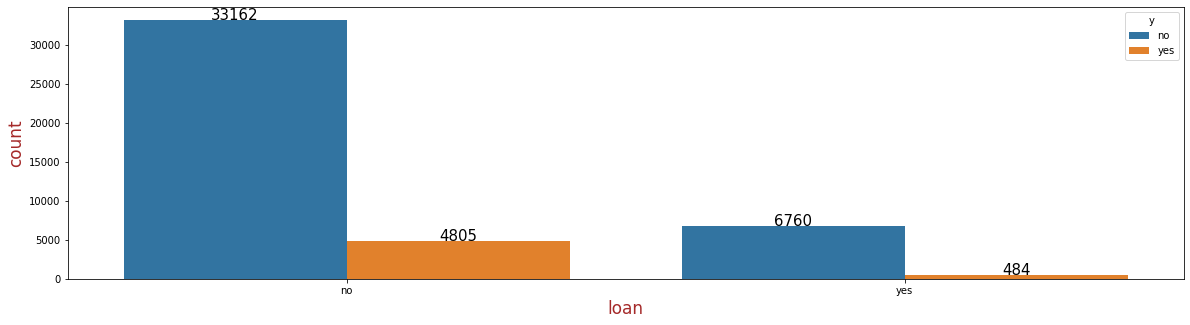

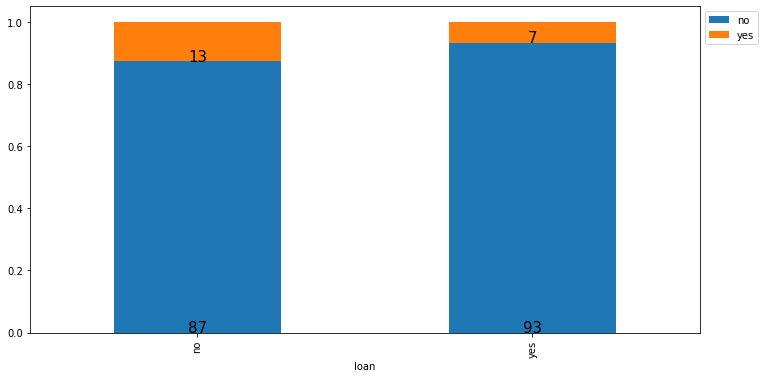

------------------------------------------------------------------------------------------------------------------------


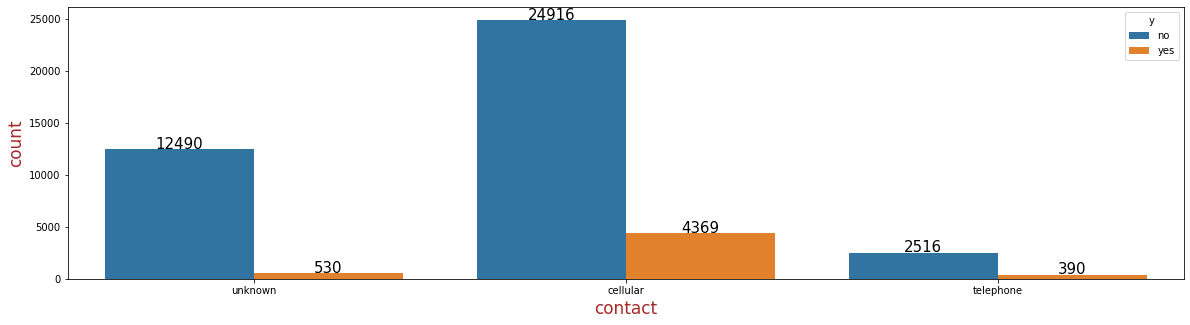

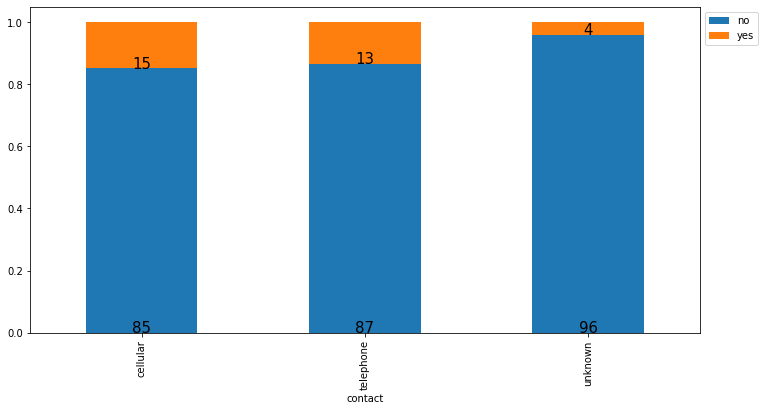

------------------------------------------------------------------------------------------------------------------------


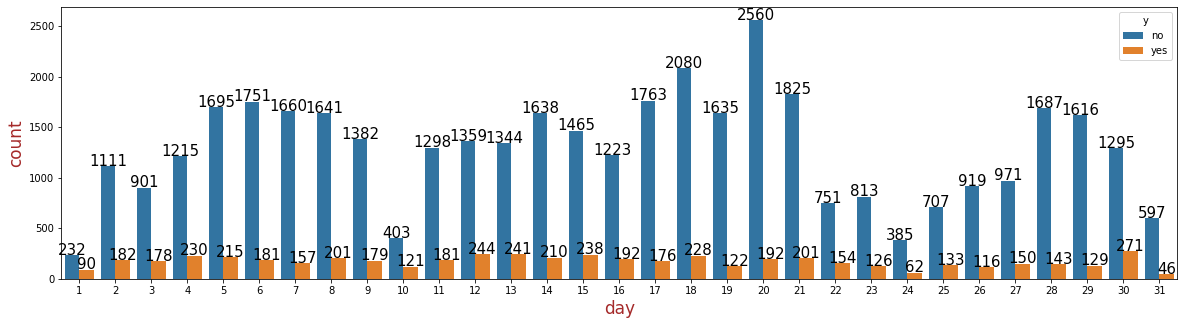

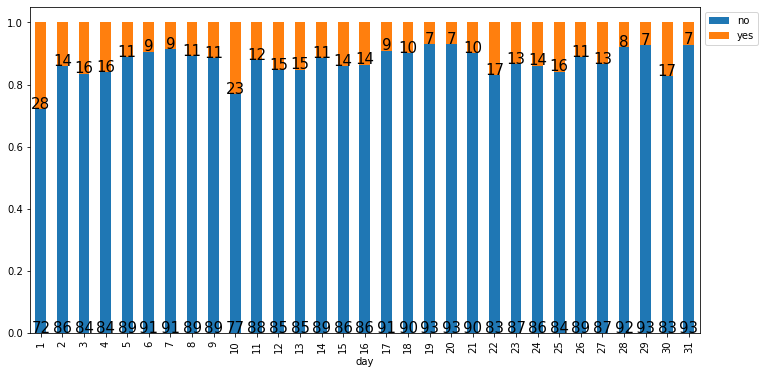

------------------------------------------------------------------------------------------------------------------------


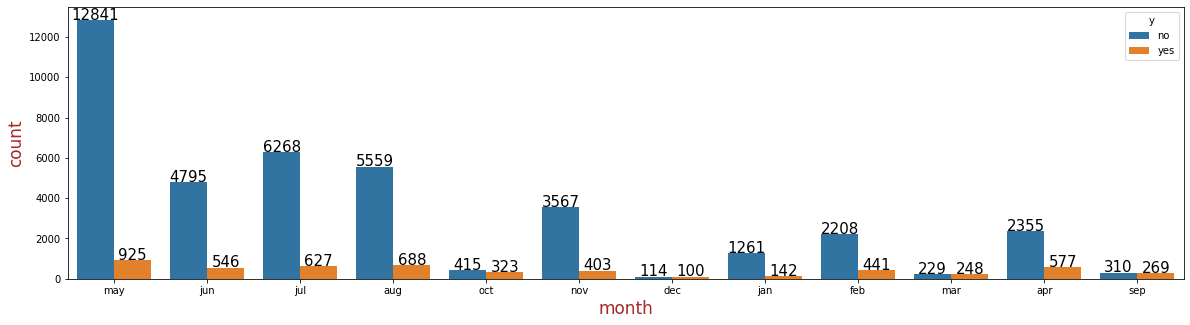

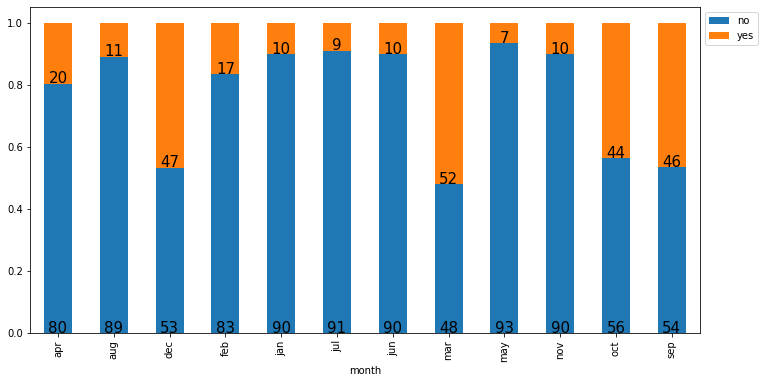

------------------------------------------------------------------------------------------------------------------------


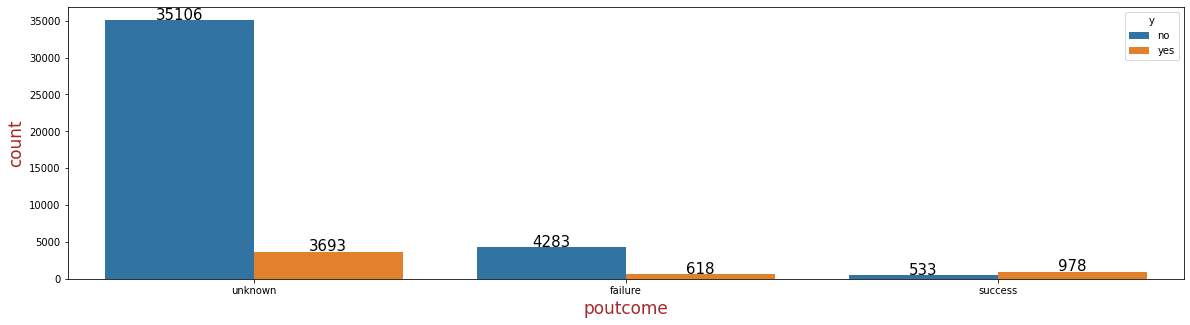

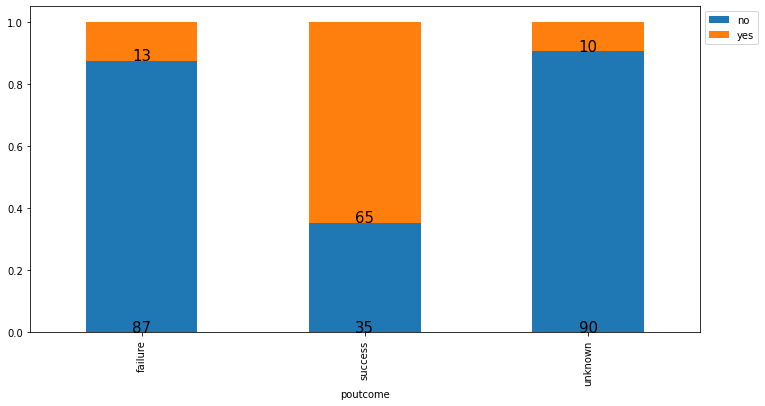

------------------------------------------------------------------------------------------------------------------------


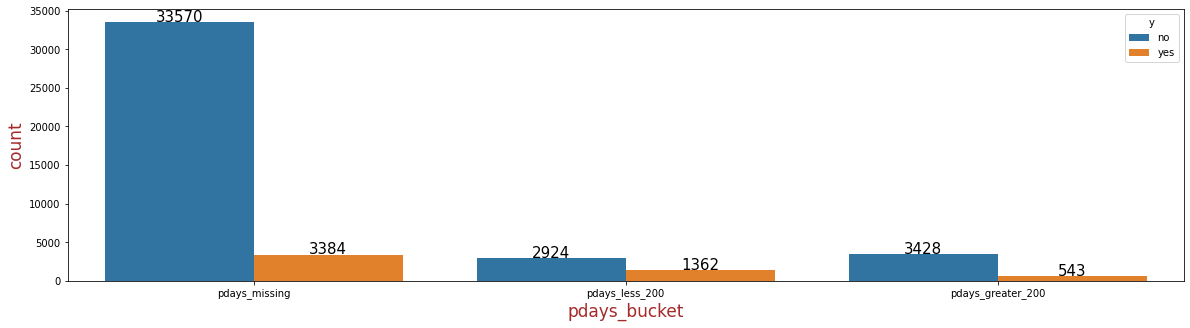

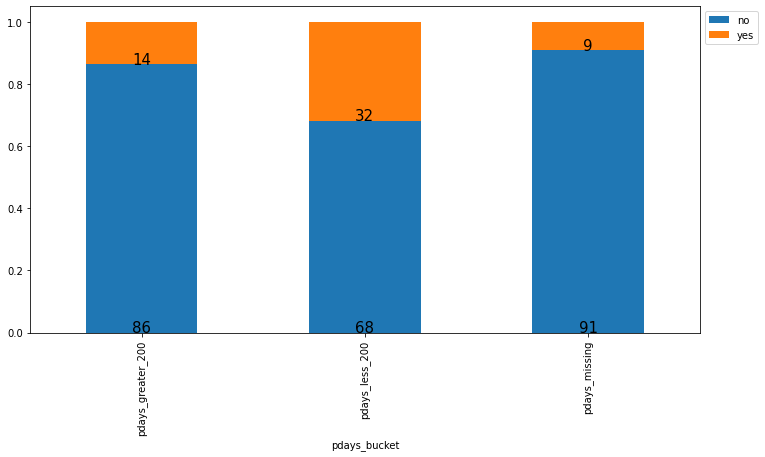

------------------------------------------------------------------------------------------------------------------------


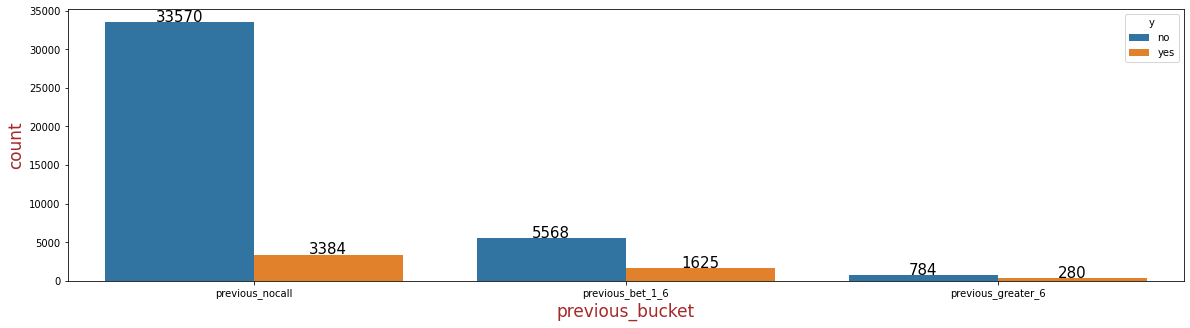

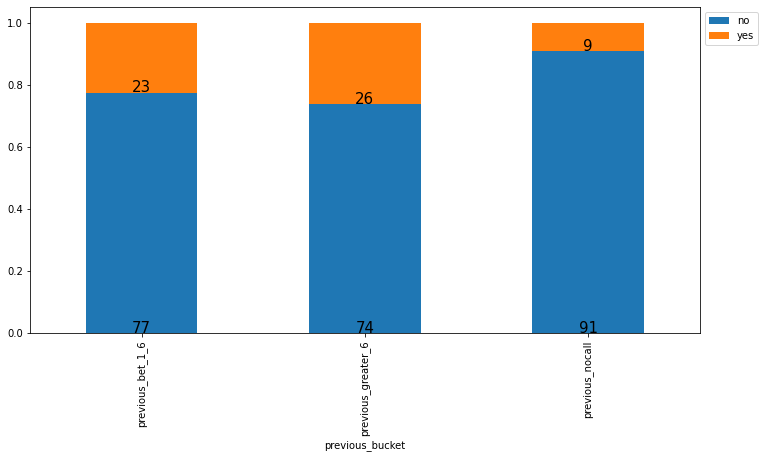

------------------------------------------------------------------------------------------------------------------------


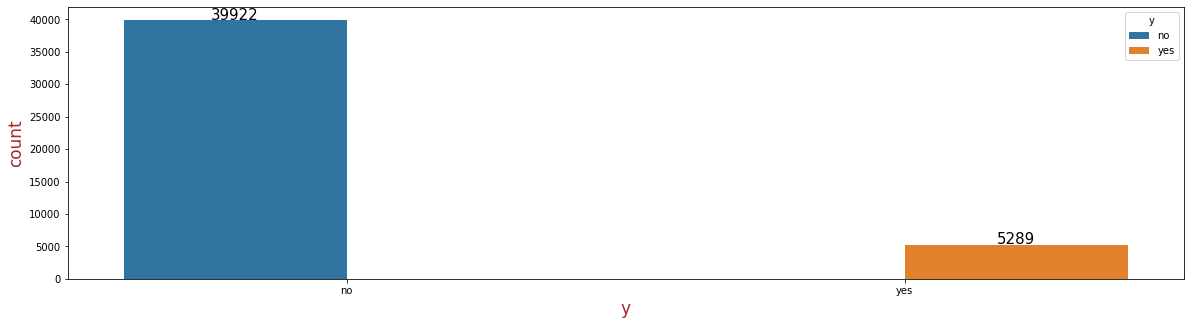

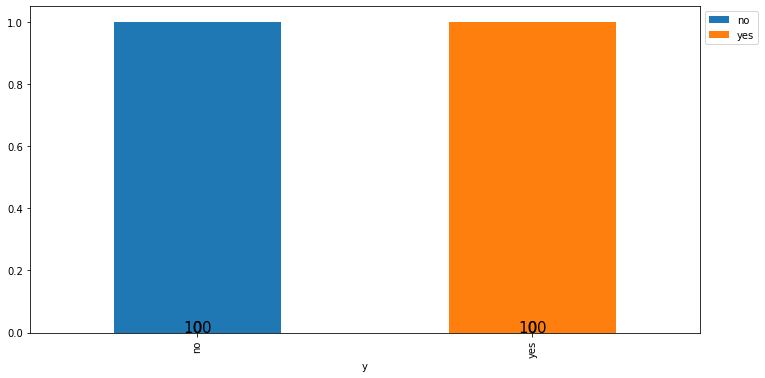

In [36]:
for column in df[cat].columns:
    plt.figure(figsize=(20,5));
    plt.xlabel(column,fontsize=17,color='Brown')
    plt.ylabel("count", fontsize=17,color='Brown')
    stacked_plot(df[column]);
    plt.show();

## **Multivariate Analysis**

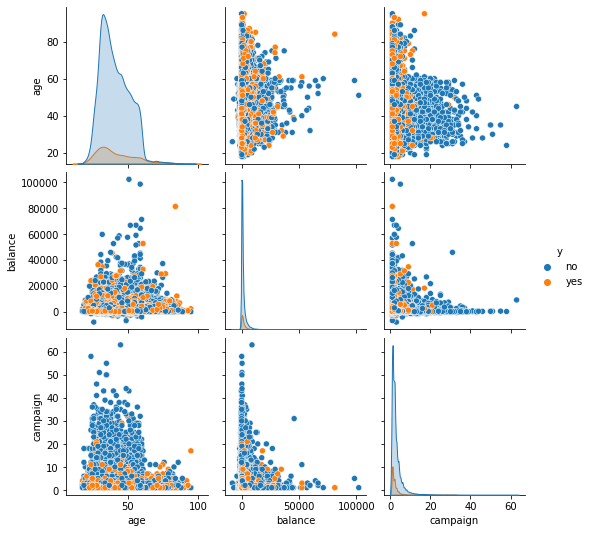

In [37]:
#Multivariate analysis using pairplot
dfpair=df[num]
dfpair['y']=df['y']
sns.pairplot(dfpair,hue='y');

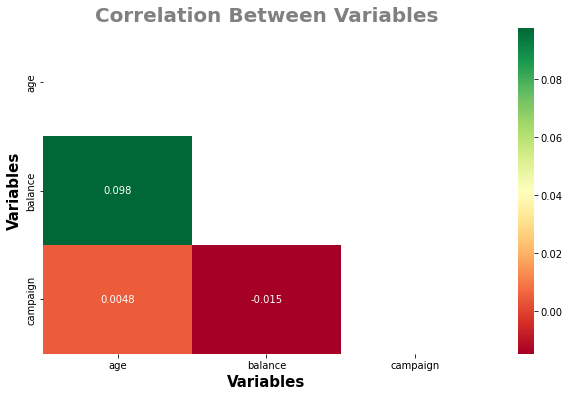

In [38]:
#Multivariate analysis using correlation plot & heatmap
plt.figure(figsize=(10,6))
m = np.zeros_like(df.corr())
m[np.triu_indices_from(m)] = 1
corrplot=sns.heatmap(df.corr(),annot=True,mask=m,fmt='.2g',cmap='RdYlGn');
corrplot.set_ylabel('Variables',fontsize=15,fontweight=1000);
corrplot.set_xlabel('Variables',fontsize=15,fontweight=1000);
corrplot.set_title('Correlation Between Variables',fontsize=20,fontweight=1000,color='Grey');

# **Variable Transformation**

## **Variable Transformation- Scaling Numerical variables**

In [39]:
ss=StandardScaler() 
df[num]=ss.fit_transform(df[num])
dfsc=df.copy()
dfsc[num]=dfsc[num].apply(zscore)

In [40]:
dfsc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,poutcome,y,pdays_bucket,previous_bucket
0,1.61,management,married,tertiary,no,0.26,yes,no,unknown,5,may,-0.57,unknown,no,pdays_missing,previous_nocall
1,0.29,technician,single,secondary,no,-0.44,yes,no,unknown,5,may,-0.57,unknown,no,pdays_missing,previous_nocall
2,-0.75,entrepreneur,married,secondary,no,-0.45,yes,yes,unknown,5,may,-0.57,unknown,no,pdays_missing,previous_nocall
3,0.57,blue-collar,married,unknown,no,0.05,yes,no,unknown,5,may,-0.57,unknown,no,pdays_missing,previous_nocall
4,-0.75,unknown,single,unknown,no,-0.45,no,no,unknown,5,may,-0.57,unknown,no,pdays_missing,previous_nocall


## **Variable Transformation- Scaling Categorical variables**

In [41]:
df2 = dfsc.copy()

In [42]:
for i in df2.columns: 
    if df2[i].dtype == 'object': 
        print('\n')
        print('\033[1m','Feature:',i,'\033[0m')
        print(pd.Categorical(df2[i].unique()))
        print(pd.Categorical(df2[i].unique()).codes)
        df2[i] = pd.Categorical(df2[i]).codes




 Feature: job 
['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']
[ 4  9  2  1 11  5  0  7  6 10  3  8]


 Feature: marital 
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']
[1 2 0]


 Feature: education 
['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']
[2 1 3 0]


 Feature: default 
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


 Feature: housing 
['yes', 'no']
Categories (2, object): ['no', 'yes']
[1 0]


 Feature: loan 
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


 Feature: contact 
['unknown', 'cellular', 'telephone']
Categories (3, object): ['cellular', 'telephone', 'unknown']
[2 

In [43]:
df2.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,poutcome,y,pdays_bucket,previous_bucket
0,1.61,4,1,2,0,0.26,1,0,2,4,8,-0.57,2,0,2,2
1,0.29,9,2,1,0,-0.44,1,0,2,4,8,-0.57,2,0,2,2
2,-0.75,2,1,1,0,-0.45,1,1,2,4,8,-0.57,2,0,2,2
3,0.57,1,1,3,0,0.05,1,0,2,4,8,-0.57,2,0,2,2
4,-0.75,11,2,3,0,-0.45,0,0,2,4,8,-0.57,2,0,2,2


## **Separating Target and dependent variables**

In [44]:
# Saving all the independent variables in x
x = df2.drop('y', axis=1)
# Copying target variable in y 
y = df2[['y']]


In [45]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,poutcome,pdays_bucket,previous_bucket
0,1.61,4,1,2,0,0.26,1,0,2,4,8,-0.57,2,2,2
1,0.29,9,2,1,0,-0.44,1,0,2,4,8,-0.57,2,2,2
2,-0.75,2,1,1,0,-0.45,1,1,2,4,8,-0.57,2,2,2
3,0.57,1,1,3,0,0.05,1,0,2,4,8,-0.57,2,2,2
4,-0.75,11,2,3,0,-0.45,0,0,2,4,8,-0.57,2,2,2


In [46]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


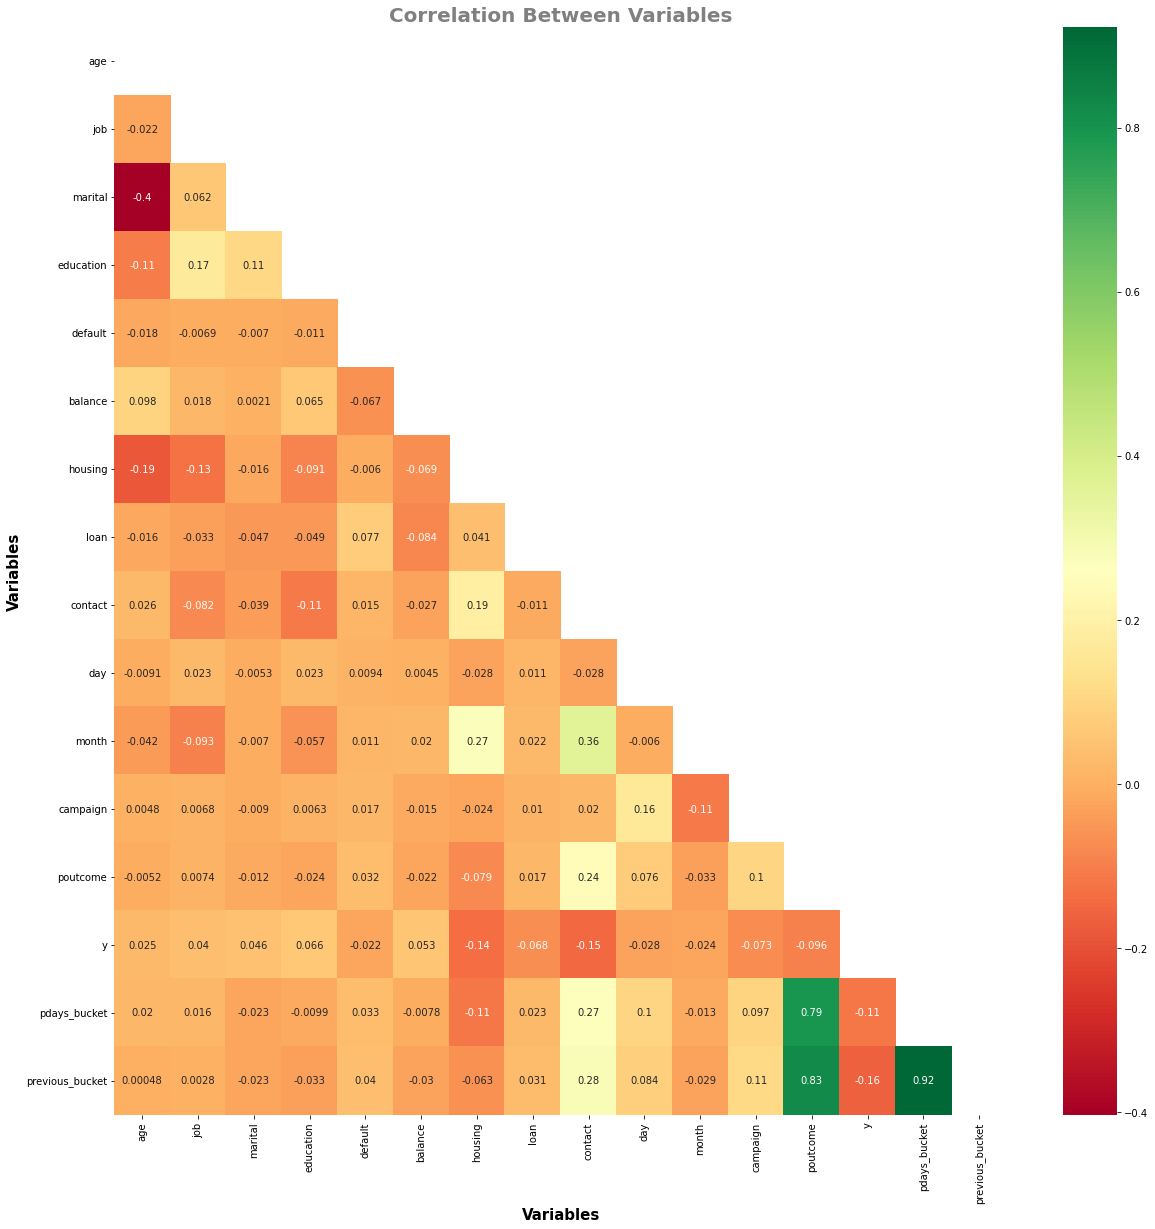

In [47]:
#Multivariate analysis using correlation plot & heatmap
plt.figure(figsize=(20,20))
m = np.zeros_like(df2.corr())
m[np.triu_indices_from(m)] = 1
corrplot=sns.heatmap(df2.corr(),annot=True,mask=m,fmt='.2g',cmap='RdYlGn');
corrplot.set_ylabel('Variables',fontsize=15,fontweight=1000);
corrplot.set_xlabel('Variables',fontsize=15,fontweight=1000);
corrplot.set_title('Correlation Between Variables',fontsize=20,fontweight=1000,color='Grey');

# **Train-Test Split**

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=1)

In [49]:
print("\033[0mNumber of subscription (% of Total)          : \033[1m{0} ({1:0.2f}%)".format(len(df2.loc[df2['y'] == 1]), (len(df2.loc[df2['y'] == 1])/len(df2.index)) * 100))
print("\nTrain dataset")
print("\033[0mNumber of subscription (% of Total)          : \033[1m{0} ({1:0.2f}%)".format(y_train[y_train[:] == 1].value_counts().sum(), y_train[y_train[:] == 1].value_counts().sum()/len(y_train) * 100))
print("\nTest dataset")
print("\033[0mNumber of subscription (% of Total)          : \033[1m{0} ({1:0.2f}%)".format(y_test[y_test[:] == 1].value_counts().sum(), y_test[y_test[:] == 1].value_counts().sum()/len(y_test) * 100))
print("")

Number of subscription (% of Total)          : 5289 (11.70%)

Train dataset
Number of subscription (% of Total)          : 3738 (11.81%)

Test dataset
Number of subscription (% of Total)          : 1551 (11.43%)



# **Balancing the dataset**

***Since dataset is not balanced it is imperative to balance the data before building the model***

In [50]:
smo = SMOTEENN(random_state=42)
x_train_sm, y_train_sm = smo.fit_resample(x_train, y_train)

In [51]:
y_train_sm.value_counts()

y
1    25989
0    18755
dtype: int64

# **Model development**

### ***Logistics Regression***

In [52]:
lr = LogisticRegression()
lr.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [53]:
#Predicting on Training and Test dataset
y_train_pred_lr=lr.predict(x_train_sm)
y_test_pred_lr=lr.predict(x_test)

In [54]:
#Calculating probability in train dataset
y_train_prob_pred_lr = lr.predict_proba(x_train_sm)[:,1]
y_train_prob_pred_lr

array([0.0344145 , 0.39661193, 0.07812765, ..., 0.87588555, 0.41044479,
       0.54798019])

In [55]:
#Calculating probability in test dataset
y_test_prob_pred_lr = lr.predict_proba(x_test)[:,1]
y_test_prob_pred_lr

array([0.16557574, 0.46010654, 0.35367844, ..., 0.54799675, 0.49853706,
       0.79435876])

**Validating the model on train dataset**

 Accuracy for the Model based on training data is 0.7579


 Classification report for the Model based on training data  
 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69     18755
           1       0.77      0.84      0.80     25989

    accuracy                           0.76     44744
   macro avg       0.75      0.74      0.75     44744
weighted avg       0.76      0.76      0.75     44744



 Confusion Matrix for the Model based on training data 


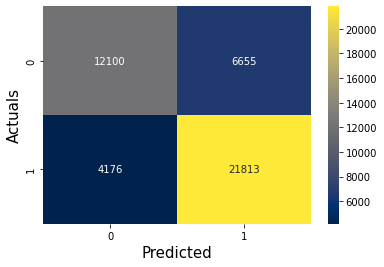

In [56]:
# Confusion Matrix & Classification report for Training Data
print('\033[1m','Accuracy for the Model based on training data is',accuracy_score(y_train_sm,y_train_pred_lr).round(4))
print('\n')
print('\033[1m','Classification report for the Model based on training data','\033[0m \n','\n',classification_report(y_train_sm,y_train_pred_lr))
print('\n')
print('\033[1m','Confusion Matrix for the Model based on training data','\033[0m')
sns.heatmap((confusion_matrix(y_train_sm,y_train_pred_lr)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);


Area under the curve (ROC_AUC score) for the Model based on training data is 0.8366


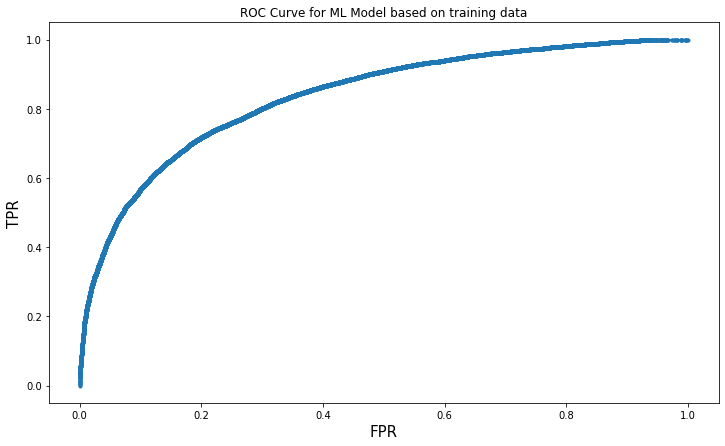

In [57]:
#ROC AUC Score
print('Area under the curve (ROC_AUC score) for the Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_lr).round(4))
plt.figure(figsize=(12,7))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train_sm, y_train_prob_pred_lr)
plt.plot(fpr_lr, tpr_lr, marker='.');
plt.title('ROC Curve for {} based on training data'.format('ML Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

**Validating the model on test dataset**

 Accuracy for the Model based on testing dataset is 0.6026


 Classification report for the Model based on testing data  
 
               precision    recall  f1-score   support

           0       0.94      0.59      0.72     12013
           1       0.18      0.71      0.29      1551

    accuracy                           0.60     13564
   macro avg       0.56      0.65      0.51     13564
weighted avg       0.85      0.60      0.67     13564



 Confusion Matrix for the Model based on testing data 


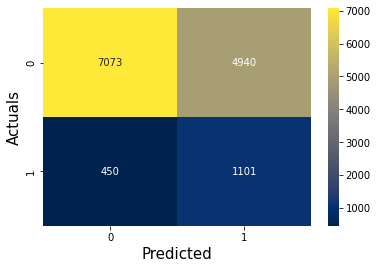

In [58]:
#Confusion Matrix & Classification report for Testing Data
print('\033[1m','Accuracy for the Model based on testing dataset is',accuracy_score(y_test,y_test_pred_lr).round(4))
print('\n')
print('\033[1m','Classification report for the Model based on testing data','\033[0m \n','\n',classification_report(y_test,y_test_pred_lr))
print('\n')
print('\033[1m','Confusion Matrix for the Model based on testing data','\033[0m')
sns.heatmap((confusion_matrix(y_test,y_test_pred_lr)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);

Area under the curve (ROC_AUC score) for the Model based on testing data is 0.7111


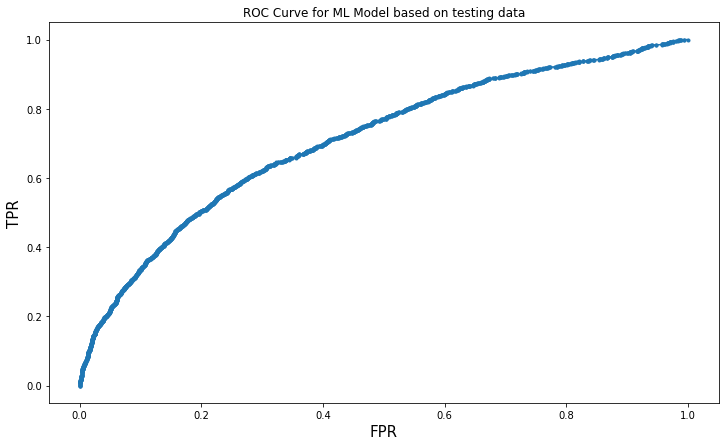

In [59]:
#ROC AUC Score
print('Area under the curve (ROC_AUC score) for the Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_lr).round(4))
plt.figure(figsize=(12,7))
fpr_lrtest, tpr_lrtest, thresholds_lrtest = roc_curve(y_test,y_test_prob_pred_lr)
plt.plot(fpr_lrtest, tpr_lrtest, marker='.');
plt.title('ROC Curve for {} based on testing data'.format('ML Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

In [60]:
print('\033[1m','Variable Coefficients for the Model','\033[0m')
print (pd.DataFrame(lr.coef_[0], columns = ["Coefficients"], index = x_train_sm.columns).sort_values('Coefficients',ascending=False,key=abs))
print('\n')

 Variable Coefficients for the Model 
                 Coefficients
loan                    -1.90
default                 -1.87
housing                 -1.56
previous_bucket         -0.95
contact                 -0.80
campaign                -0.47
pdays_bucket             0.42
marital                 -0.31
poutcome                 0.25
age                     -0.19
education               -0.15
balance                  0.12
month                    0.07
day                     -0.02
job                     -0.01




### ***Linear Discriminant Analysis***

In [61]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_sm, y_train_sm)

LinearDiscriminantAnalysis()

In [62]:
#Predicting on Training and Test dataset
y_train_pred_lda=lda.predict(x_train_sm)
y_test_pred_lda=lda.predict(x_test)

In [63]:
#Calculating probability in train dataset
y_train_prob_pred_lda = lda.predict_proba(x_train_sm)[:,1]
y_train_prob_pred_lda

array([0.03292609, 0.40937681, 0.12008522, ..., 0.89599592, 0.42312074,
       0.5476181 ])

In [64]:
#Calculating probability in test dataset
y_test_prob_pred_lda = lda.predict_proba(x_test)[:,1]
y_test_prob_pred_lda

array([0.14398631, 0.45434393, 0.3714588 , ..., 0.62147381, 0.48909213,
       0.77949143])

**Validating the model on train dataset**

 Accuracy for the Model based on training data is 0.7571


 Classification report for the Model based on training data  
 
               precision    recall  f1-score   support

           0       0.75      0.63      0.68     18755
           1       0.76      0.85      0.80     25989

    accuracy                           0.76     44744
   macro avg       0.76      0.74      0.74     44744
weighted avg       0.76      0.76      0.75     44744



 Confusion Matrix for the Model based on training data 


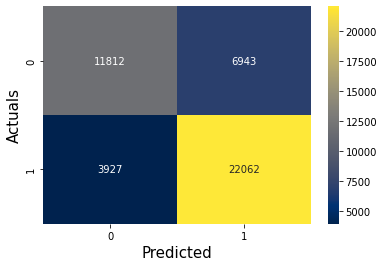

In [65]:
# Confusion Matrix & Classification report for Training Data
print('\033[1m','Accuracy for the Model based on training data is',accuracy_score(y_train_sm,y_train_pred_lda).round(4))
print('\n')
print('\033[1m','Classification report for the Model based on training data','\033[0m \n','\n',classification_report(y_train_sm,y_train_pred_lda))
print('\n')
print('\033[1m','Confusion Matrix for the Model based on training data','\033[0m')
sns.heatmap((confusion_matrix(y_train_sm,y_train_pred_lda)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);


Area under the curve (ROC_AUC score) for the Model based on training data is 0.8371


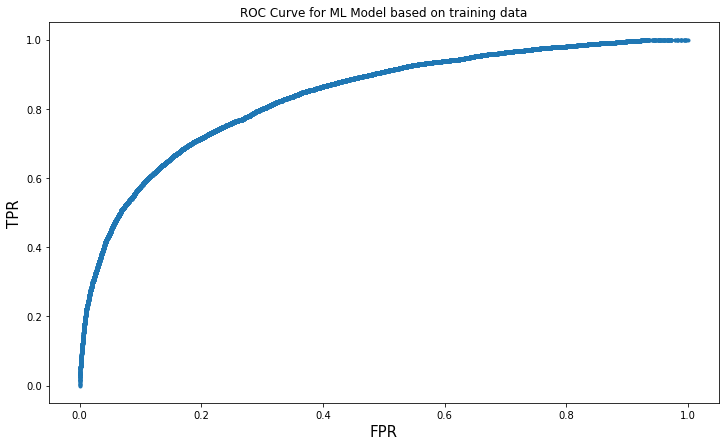

In [66]:
#ROC AUC Score
print('Area under the curve (ROC_AUC score) for the Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_lda).round(4))
plt.figure(figsize=(12,7))
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_train_sm, y_train_prob_pred_lda)
plt.plot(fpr_lda, tpr_lda, marker='.');
plt.title('ROC Curve for {} based on training data'.format('ML Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

**Validating the model on test dataset**

 Accuracy for the Model based on testing dataset is 0.5893


 Classification report for the Model based on testing data  
 
               precision    recall  f1-score   support

           0       0.94      0.57      0.71     12013
           1       0.18      0.72      0.29      1551

    accuracy                           0.59     13564
   macro avg       0.56      0.65      0.50     13564
weighted avg       0.85      0.59      0.66     13564



 Confusion Matrix for the Model based on testing data 


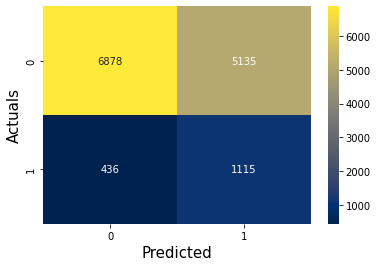

In [67]:
#Confusion Matrix & Classification report for Testing Data
print('\033[1m','Accuracy for the Model based on testing dataset is',accuracy_score(y_test,y_test_pred_lda).round(4))
print('\n')
print('\033[1m','Classification report for the Model based on testing data','\033[0m \n','\n',classification_report(y_test,y_test_pred_lda))
print('\n')
print('\033[1m','Confusion Matrix for the Model based on testing data','\033[0m')
sns.heatmap((confusion_matrix(y_test,y_test_pred_lda)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);

Area under the curve (ROC_AUC score) for the Model based on testing data is 0.7119


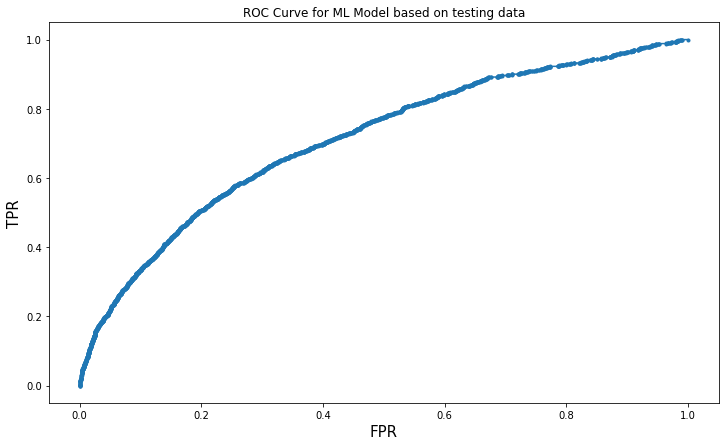

In [68]:
#ROC AUC Score
print('Area under the curve (ROC_AUC score) for the Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_lda).round(4))
plt.figure(figsize=(12,7))
fpr_ldatest, tpr_ldatest, thresholds_ldatest = roc_curve(y_test,y_test_prob_pred_lda)
plt.plot(fpr_ldatest, tpr_ldatest, marker='.');
plt.title('ROC Curve for {} based on testing data'.format('ML Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

In [69]:
print('\033[1m','Variable Coefficients for the Model','\033[0m')
print (pd.DataFrame(lda.coef_[0], columns = ["Coefficients"], index = x_train_sm.columns).sort_values('Coefficients',ascending=False,key=abs))
print('\n')

 Variable Coefficients for the Model 
                 Coefficients
loan                    -1.91
housing                 -1.73
default                 -1.66
contact                 -0.92
previous_bucket         -0.88
pdays_bucket             0.40
campaign                -0.38
marital                 -0.30
poutcome                 0.20
age                     -0.18
education               -0.14
balance                  0.11
month                    0.07
day                     -0.02
job                     -0.01




### ***NaiveBayes Model***

In [70]:
nb = GaussianNB()
nb.fit(x_train_sm, y_train_sm)

GaussianNB()

In [71]:
#Predicting on Training and Test dataset
y_train_pred_nb=nb.predict(x_train_sm)
y_test_pred_nb=nb.predict(x_test)

In [72]:
#Calculating probability in train dataset
y_train_prob_pred_nb = nb.predict_proba(x_train_sm)[:,1]
y_train_prob_pred_nb

array([2.38959271e-153, 8.54471416e-001, 5.43137683e-157, ...,
       9.83276114e-001, 1.73509128e-002, 6.64035594e-001])

In [73]:
#Calculating probability in test dataset
y_test_prob_pred_nb = nb.predict_proba(x_test)[:,1]
y_test_prob_pred_nb

array([0.00755739, 0.15065101, 0.71263115, ..., 0.85664227, 0.20789265,
       0.99904547])

**Validating the model on train dataset**

 Accuracy for the Model based on training data is 0.7433


 Classification report for the Model based on training data  
 
               precision    recall  f1-score   support

           0       0.76      0.56      0.65     18755
           1       0.73      0.87      0.80     25989

    accuracy                           0.74     44744
   macro avg       0.75      0.72      0.72     44744
weighted avg       0.75      0.74      0.74     44744



 Confusion Matrix for the Model based on training data 


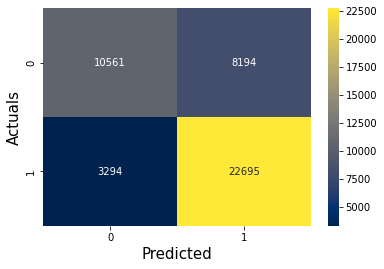

In [74]:
# Confusion Matrix & Classification report for Training Data
print('\033[1m','Accuracy for the Model based on training data is',accuracy_score(y_train_sm,y_train_pred_nb).round(4))
print('\n')
print('\033[1m','Classification report for the Model based on training data','\033[0m \n','\n',classification_report(y_train_sm,y_train_pred_nb))
print('\n')
print('\033[1m','Confusion Matrix for the Model based on training data','\033[0m')
sns.heatmap((confusion_matrix(y_train_sm,y_train_pred_nb)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);


Area under the curve (ROC_AUC score) for the Model based on training data is 0.7989


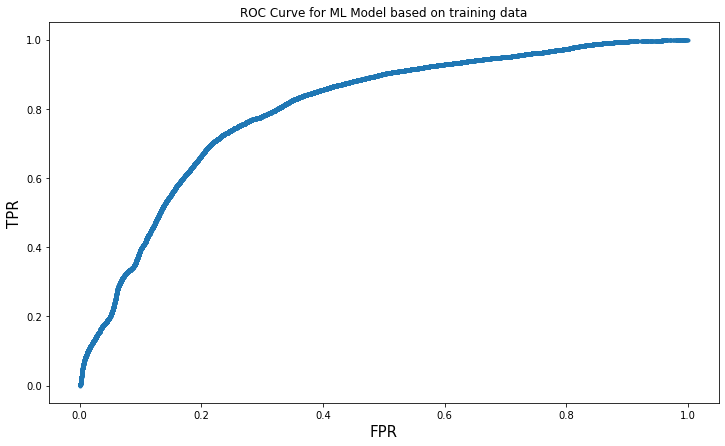

In [75]:
#ROC AUC Score
print('Area under the curve (ROC_AUC score) for the Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_nb).round(4))
plt.figure(figsize=(12,7))
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_train_sm, y_train_prob_pred_nb)
plt.plot(fpr_nb, tpr_nb, marker='.');
plt.title('ROC Curve for {} based on training data'.format('ML Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

**Validating the model on test dataset**

 Accuracy for the Model based on testing dataset is 0.532


 Classification report for the Model based on testing data  
 
               precision    recall  f1-score   support

           0       0.95      0.50      0.65     12013
           1       0.17      0.79      0.28      1551

    accuracy                           0.53     13564
   macro avg       0.56      0.64      0.47     13564
weighted avg       0.86      0.53      0.61     13564



 Confusion Matrix for the Model based on testing data 


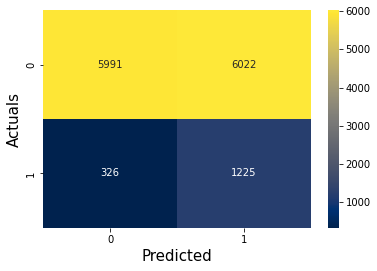

In [76]:
#Confusion Matrix & Classification report for Testing Data
print('\033[1m','Accuracy for the Model based on testing dataset is',accuracy_score(y_test,y_test_pred_nb).round(4))
print('\n')
print('\033[1m','Classification report for the Model based on testing data','\033[0m \n','\n',classification_report(y_test,y_test_pred_nb))
print('\n')
print('\033[1m','Confusion Matrix for the Model based on testing data','\033[0m')
sns.heatmap((confusion_matrix(y_test,y_test_pred_nb)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);

Area under the curve (ROC_AUC score) for the Model based on testing data is 0.6974


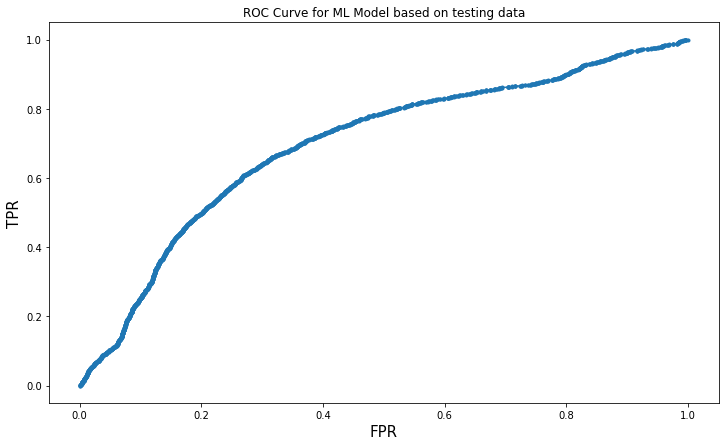

In [77]:
#ROC AUC Score
print('Area under the curve (ROC_AUC score) for the Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_nb).round(4))
plt.figure(figsize=(12,7))
fpr_nbtest, tpr_nbtest, thresholds_nbtest = roc_curve(y_test,y_test_prob_pred_nb)
plt.plot(fpr_nbtest, tpr_nbtest, marker='.');
plt.title('ROC Curve for {} based on testing data'.format('ML Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

### ***ANN Model***

In [78]:
ann = MLPClassifier(random_state=42)
ann.fit(x_train_sm, y_train_sm)

MLPClassifier(random_state=42)

In [79]:
#Predicting on Training and Test dataset
y_train_pred_ann=ann.predict(x_train_sm)
y_test_pred_ann=ann.predict(x_test)

In [80]:
#Calculating probability in train dataset
y_train_prob_pred_ann = ann.predict_proba(x_train_sm)[:,1]
y_train_prob_pred_ann

array([0.07073024, 0.19416729, 0.01782675, ..., 0.99300667, 0.75742443,
       0.46092681])

In [81]:
#Calculating probability in test dataset
y_test_prob_pred_ann = ann.predict_proba(x_test)[:,1]
y_test_prob_pred_ann

array([0.44316409, 0.51878025, 0.18119198, ..., 0.06885504, 0.23717667,
       0.67590738])

**Validating the model on train dataset**

 Accuracy for the Model based on training data is 0.8492


 Classification report for the Model based on training data  
 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83     18755
           1       0.90      0.83      0.86     25989

    accuracy                           0.85     44744
   macro avg       0.85      0.85      0.85     44744
weighted avg       0.85      0.85      0.85     44744



 Confusion Matrix for the Model based on training data 


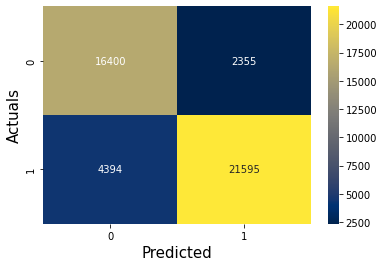

In [82]:
# Confusion Matrix & Classification report for Training Data
print('\033[1m','Accuracy for the Model based on training data is',accuracy_score(y_train_sm,y_train_pred_ann).round(4))
print('\n')
print('\033[1m','Classification report for the Model based on training data','\033[0m \n','\n',classification_report(y_train_sm,y_train_pred_ann))
print('\n')
print('\033[1m','Confusion Matrix for the Model based on training data','\033[0m')
sns.heatmap((confusion_matrix(y_train_sm,y_train_pred_ann)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);


Area under the curve (ROC_AUC score) for the Model based on training data is 0.8366


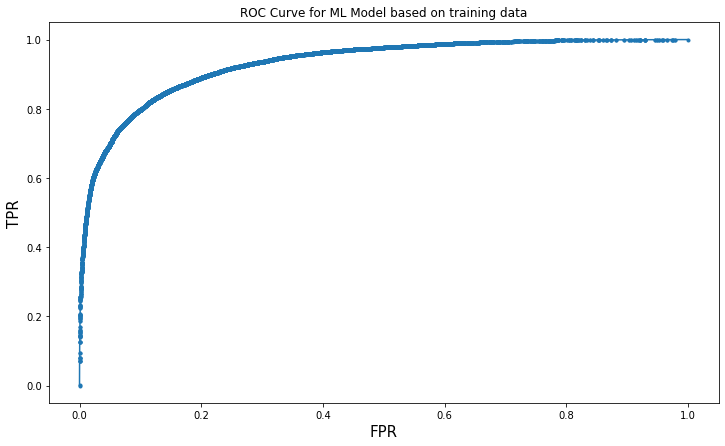

In [83]:
#ROC AUC Score
print('Area under the curve (ROC_AUC score) for the Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_lr).round(4))
plt.figure(figsize=(12,7))
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_train_sm, y_train_prob_pred_ann)
plt.plot(fpr_ann, tpr_ann, marker='.');
plt.title('ROC Curve for {} based on training data'.format('ML Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

**Validating the model on test dataset**

 Accuracy for the Model based on testing dataset is 0.749


 Classification report for the Model based on testing data  
 
               precision    recall  f1-score   support

           0       0.94      0.77      0.84     12013
           1       0.25      0.62      0.36      1551

    accuracy                           0.75     13564
   macro avg       0.60      0.69      0.60     13564
weighted avg       0.86      0.75      0.79     13564



 Confusion Matrix for the Model based on testing data 


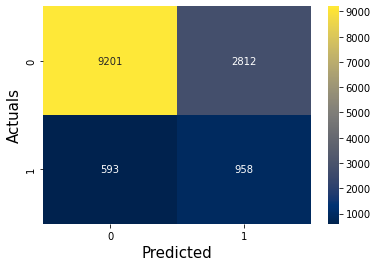

In [84]:
#Confusion Matrix & Classification report for Testing Data
print('\033[1m','Accuracy for the Model based on testing dataset is',accuracy_score(y_test,y_test_pred_ann).round(4))
print('\n')
print('\033[1m','Classification report for the Model based on testing data','\033[0m \n','\n',classification_report(y_test,y_test_pred_ann))
print('\n')
print('\033[1m','Confusion Matrix for the Model based on testing data','\033[0m')
sns.heatmap((confusion_matrix(y_test,y_test_pred_ann)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);

Area under the curve (ROC_AUC score) for the Model based on testing data is 0.7511


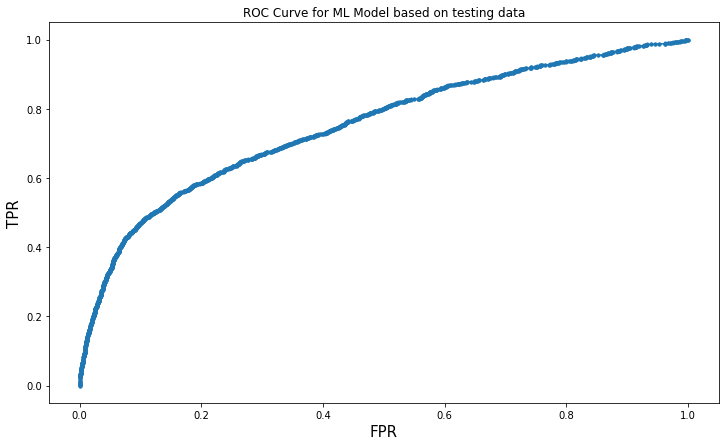

In [85]:
#ROC AUC Score
print('Area under the curve (ROC_AUC score) for the Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_ann).round(4))
plt.figure(figsize=(12,7))
fpr_anntest, tpr_anntest, thresholds_anntest = roc_curve(y_test,y_test_prob_pred_ann)
plt.plot(fpr_anntest, tpr_anntest, marker='.');
plt.title('ROC Curve for {} based on testing data'.format('ML Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

### ***Random Forest Model***

***Used grid search function to estimate the optimal parameters for Random Forest Model***

In [86]:
param_grid_rfc = {
    'max_depth': [6,8,10],
    'max_features': [4, 5, 6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [10,20,30],
    'n_estimators': [100,200]
}

rfc = RandomForestClassifier(random_state=42)

grid_search_bmrfc= GridSearchCV(estimator = rfc, param_grid = param_grid_rfc, scoring='recall', cv = 3)

In [87]:
grid_search_bmrfc.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [100, 200]},
             scoring='recall')

In [88]:
print(grid_search_bmrfc.best_params_,'\n')
print(grid_search_bmrfc.best_estimator_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100} 

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)


In [89]:
bestmodel_rfc = grid_search_bmrfc.best_estimator_
bestmodel_rfc

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

*Predicting on Training and Test dataset*

In [90]:
y_train_pred_bmrfc = bestmodel_rfc.predict(x_train_sm)
y_test_pred_bmrfc = bestmodel_rfc.predict(x_test)

*Calculating probability in train dataset*

In [91]:
y_train_prob_pred_bmrfc = bestmodel_rfc.predict_proba(x_train_sm)[:,1]
y_train_prob_pred_bmrfc

array([0.04870499, 0.27610163, 0.24126944, ..., 0.76826724, 0.48053142,
       0.49803575])

*Calculating probability in test dataset*

In [92]:
y_test_prob_pred_bmrfc = bestmodel_rfc.predict_proba(x_test)[:,1]
y_test_prob_pred_bmrfc

array([0.15894734, 0.25867239, 0.35682868, ..., 0.06403667, 0.16950935,
       0.90999041])

**Validating the model on train dataset**

 Accuracy for Best Random Forest Model based on training data is 0.8768


 Classification report for Best Random Forest Model based on training data  
 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85     18755
           1       0.90      0.89      0.89     25989

    accuracy                           0.88     44744
   macro avg       0.87      0.87      0.87     44744
weighted avg       0.88      0.88      0.88     44744



 Confusion Matrix for Best Random Forest Model based on training data 


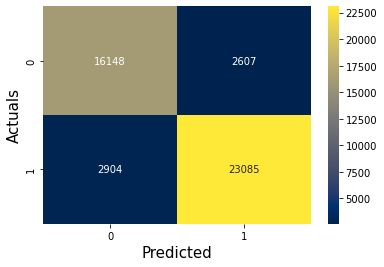

In [93]:
#Best Random Forest Model- Confusion Matrix & Classification report for Training Data
print('\033[1m','Accuracy for Best Random Forest Model based on training data is',accuracy_score(y_train_sm,y_train_pred_bmrfc).round(4))
print('\n')
print('\033[1m','Classification report for Best Random Forest Model based on training data','\033[0m \n','\n',classification_report(y_train_sm,y_train_pred_bmrfc))
print('\n')
print('\033[1m','Confusion Matrix for Best Random Forest Model based on training data','\033[0m')
sns.heatmap((confusion_matrix(y_train_sm,y_train_pred_bmrfc)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);

Area under the curve (ROC_AUC score) for Best Random Forest Model based on training data is 0.9526


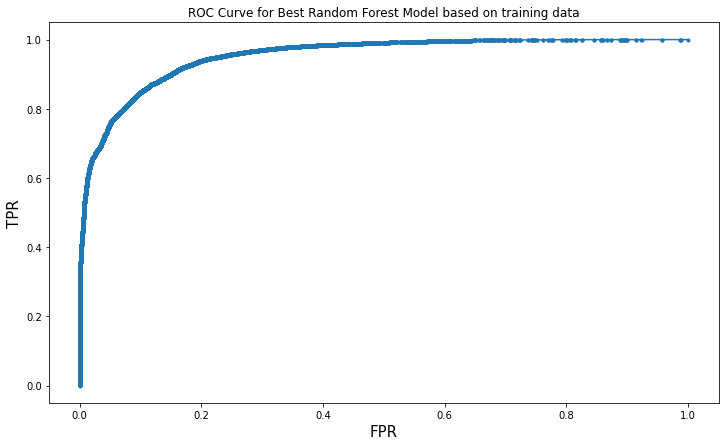

In [94]:
# ROC AUC Score
print('Area under the curve (ROC_AUC score) for Best Random Forest Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_bmrfc).round(4))
plt.figure(figsize=(12,7))
fpr_bmrfc, tpr_bmrfc, thresholds_bmrfc = roc_curve(y_train_sm, y_train_prob_pred_bmrfc)
plt.plot(fpr_bmrfc, tpr_bmrfc, marker='.');
plt.title('ROC Curve for {} based on training data'.format('Best Random Forest Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

**Validating the model on test dataset**

 Accuracy for Best Random Forest Model based on testing dataset is 0.7621


 Classification report for Best Random Forest Model based on testing data  
 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85     12013
           1       0.26      0.61      0.37      1551

    accuracy                           0.76     13564
   macro avg       0.60      0.70      0.61     13564
weighted avg       0.86      0.76      0.80     13564



 Confusion Matrix for Best Random Forest Model based on testing data 


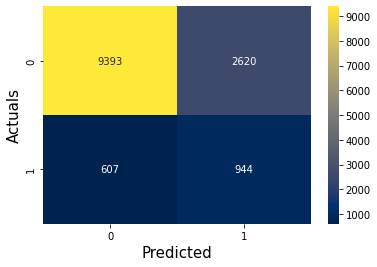

In [95]:
#Best Random Forest Model- Confusion Matrix & Classification report for Testing Data
print('\033[1m','Accuracy for Best Random Forest Model based on testing dataset is',accuracy_score(y_test,y_test_pred_bmrfc).round(4))
print('\n')
print('\033[1m','Classification report for Best Random Forest Model based on testing data','\033[0m \n','\n',classification_report(y_test,y_test_pred_bmrfc))
print('\n')
print('\033[1m','Confusion Matrix for Best Random Forest Model based on testing data','\033[0m')
sns.heatmap((confusion_matrix(y_test,y_test_pred_bmrfc)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);

Area under the curve (ROC_AUC score) for Best Random Forest Model based on testing data is 0.7672


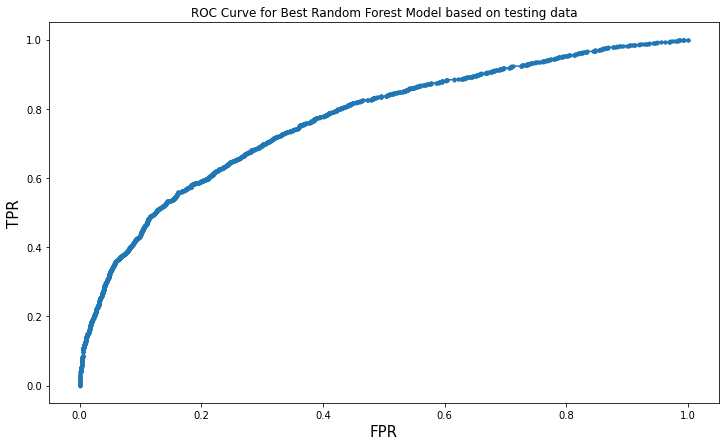

In [96]:
#ROC AUC Score
print('Area under the curve (ROC_AUC score) for Best Random Forest Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_bmrfc).round(4))
plt.figure(figsize=(12,7))
fpr_bmrfctest, tpr_bmrfctest, thresholds_bmrfctest = roc_curve(y_test,y_test_prob_pred_bmrfc)
plt.plot(fpr_bmrfctest, tpr_bmrfctest, marker='.');
plt.title('ROC Curve for {} based on testing data'.format('Best Random Forest Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

### ***Bagging (with Random Forest as base Model)***

In [97]:
bgg=BaggingClassifier(base_estimator=bestmodel_rfc,n_estimators=100,random_state=42)
bgg.fit(x_train_sm, y_train_sm)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                        max_features=6,
                                                        min_samples_leaf=5,
                                                        min_samples_split=10,
                                                        random_state=42),
                  n_estimators=100, random_state=42)

In [98]:
y_train_pred_bgg = bgg.predict(x_train_sm)
y_test_pred_bgg = bgg.predict(x_test)

In [99]:
y_train_prob_pred_bgg = bgg.predict_proba(x_train_sm)[:,1]
y_train_prob_pred_bgg

array([0.05537553, 0.29892569, 0.26584679, ..., 0.76302673, 0.50969851,
       0.50531979])

In [100]:
y_test_prob_pred_bgg = bgg.predict_proba(x_test)[:,1]
y_test_prob_pred_bgg

array([0.16571923, 0.28664807, 0.38579983, ..., 0.07590753, 0.18572504,
       0.86386208])

 Accuracy for Bagging Model based on training data is 0.875


 Classification report for Bagging Model based on training data  
 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     18755
           1       0.90      0.88      0.89     25989

    accuracy                           0.87     44744
   macro avg       0.87      0.87      0.87     44744
weighted avg       0.88      0.87      0.88     44744



 Confusion Matrix for Bagging Model based on training data 


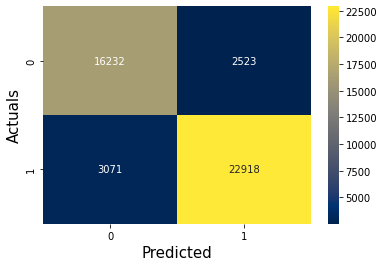

In [101]:
#Bagging- Confusion Matrix & Classification report for Training Data
print('\033[1m','Accuracy for Bagging Model based on training data is',accuracy_score(y_train_sm,y_train_pred_bgg).round(4))
print('\n')
print('\033[1m','Classification report for Bagging Model based on training data','\033[0m \n','\n',classification_report(y_train_sm,y_train_pred_bgg))
print('\n')
print('\033[1m','Confusion Matrix for Bagging Model based on training data','\033[0m')
sns.heatmap((confusion_matrix(y_train_sm,y_train_pred_bgg)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);

Area under the curve (ROC_AUC score) for Bagging Model based on training data is 0.9522


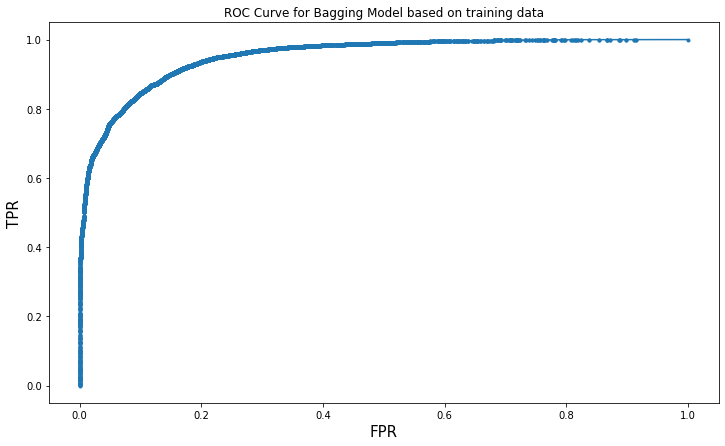

In [102]:
print('Area under the curve (ROC_AUC score) for Bagging Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_bgg).round(4))
plt.figure(figsize=(12,7))
fpr_bgg, tpr_bgg, thresholds_bgg = roc_curve(y_train_sm, y_train_prob_pred_bgg)
plt.plot(fpr_bgg, tpr_bgg, marker='.');
plt.title('ROC Curve for {} based on training data'.format('Bagging Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

 Accuracy for Bagging Model based on testing dataset is 0.7667


 Classification report for Bagging Model based on testing data  
 
               precision    recall  f1-score   support

           0       0.94      0.79      0.86     12013
           1       0.27      0.61      0.37      1551

    accuracy                           0.77     13564
   macro avg       0.60      0.70      0.61     13564
weighted avg       0.86      0.77      0.80     13564



 Confusion Matrix for Bagging Model based on testing data 


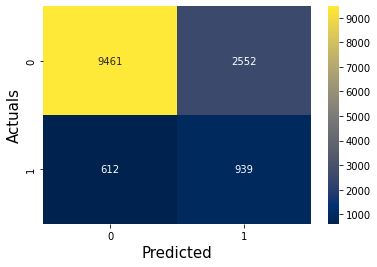

In [103]:
#Bagging- Confusion Matrix & Classification report for Testing Data
print('\033[1m','Accuracy for Bagging Model based on testing dataset is',accuracy_score(y_test,y_test_pred_bgg).round(4))
print('\n')
print('\033[1m','Classification report for Bagging Model based on testing data','\033[0m \n','\n',classification_report(y_test,y_test_pred_bgg))
print('\n')
print('\033[1m','Confusion Matrix for Bagging Model based on testing data','\033[0m')
sns.heatmap((confusion_matrix(y_test,y_test_pred_bgg)),annot=True,fmt='.5g',cmap='cividis');
plt.xlabel('Predicted',size=15);
plt.ylabel('Actuals',rotation=90,size=15);

Area under the curve (ROC_AUC score) for Bagging Model based on testing data is 0.7671


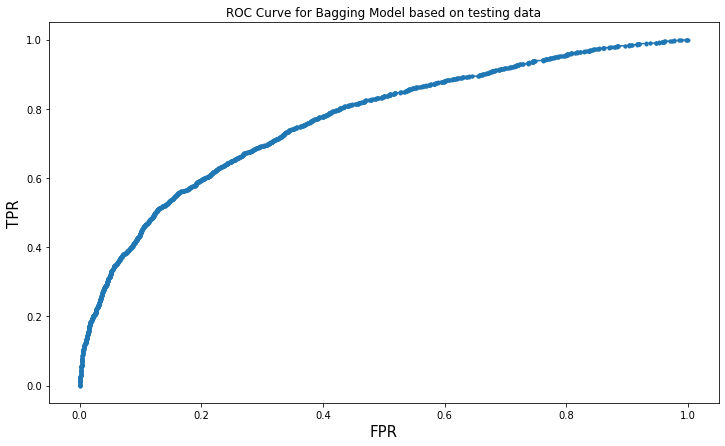

In [104]:
print('Area under the curve (ROC_AUC score) for Bagging Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_bgg).round(4))
plt.figure(figsize=(12,7))
fpr_bggtest, tpr_bggtest, thresholds_bggtest = roc_curve(y_test,y_test_prob_pred_bgg)
plt.plot(fpr_bggtest, tpr_bggtest, marker='.');
plt.title('ROC Curve for {} based on testing data'.format('Bagging Model'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.show()

### ***Model comparison***

In [105]:
models=[lr,lda,nb,ann,bestmodel_rfc,bgg]

scores_train=[]
scores_test=[]
f1sc_train=[]
f1sc_test=[]
recall_train=[]
recall_test=[]
rocauc_train=[]
rocauc_test=[]
prec_train=[]
prec_test=[]

for i in models:
    scores_train.append(i.score(x_train_sm, y_train_sm).round(4))
    scores_test.append(i.score(x_test, y_test).round(4))
    f1sc_train.append(f1_score(y_train_sm, i.predict(x_train_sm)).round(4))
    f1sc_test.append(f1_score(y_test, i.predict(x_test)).round(4))
    recall_train.append(recall_score(y_train_sm, i.predict(x_train_sm)).round(4))
    recall_test.append(recall_score(y_test, i.predict(x_test)).round(4))
    rocauc_train.append(roc_auc_score(y_train_sm,i.predict_proba(x_train_sm)[:,1]).round(4))
    rocauc_test.append(roc_auc_score(y_test,i.predict_proba(x_test)[:,1]).round(4))
    prec_train.append(precision_score(y_train_sm, i.predict(x_train_sm)).round(4))
    prec_test.append(precision_score(y_test, i.predict(x_test)).round(4))

metrics_summary=pd.DataFrame({'Training Accuracy':scores_train,
                 'Test Accuracy': scores_test,
                 'Training F1Score':f1sc_train,
                 'Testing F1Score':f1sc_test,
                 'Training Precision':prec_train,
                 'Testing Precision':prec_test,
                 'Training Recall':recall_train,
                 'Testing Recall':recall_test,
                 'Training ROCAUC Score':rocauc_train,
                 'Testing ROCAUC Score':rocauc_test},
                index=['Logistic Regression','LDA','Naive Bayes','ANN','RandomForest','Bagging'])
metrics_summary

,Training Accuracy,Test Accuracy,Training F1Score,Testing F1Score,Training Precision,Testing Precision,Training Recall,Testing Recall,Training ROCAUC Score,Testing ROCAUC Score
Logistic Regression,0.76,0.60,0.80,0.29,0.77,0.18,0.84,0.71,0.84,0.71
LDA,0.76,0.59,0.80,0.29,0.76,0.18,0.85,0.72,0.84,0.71
Naive Bayes,0.74,0.53,0.80,0.28,0.73,0.17,0.87,0.79,0.80,0.70
ANN,0.85,0.75,0.86,0.36,0.90,0.25,0.83,0.62,0.93,0.75
RandomForest,0.88,0.76,0.89,0.37,0.90,0.26,0.89,0.61,0.95,0.77
Bagging,0.88,0.77,0.89,0.37,0.90,0.27,0.88,0.61,0.95,0.77


In [107]:
models_names2={lr:'Logistics Regression',lda:'Linear Discriminant Analysis', nb:'Naive Bayes Model',
              ann:'Artificial Neural Network',bestmodel_rfc:'Random Forest',bgg:'Bagging'}
models_names2.values()

dict_values(['Logistics Regression', 'Linear Discriminant Analysis', 'Naive Bayes Model', 'Artificial Neural Network', 'Random Forest', 'Bagging'])

Area under the curve (ROC_AUC score) for Logistic Regression Model based on training data is 0.8366
Area under the curve (ROC_AUC score) for Linear Discriminant Analysis Model based on training data is 0.8371
Area under the curve (ROC_AUC score) for Naive Bayes Model based on training data is 0.7989
Area under the curve (ROC_AUC score) for Artificial Neural Network Model based on training data is 0.9316
Area under the curve (ROC_AUC score) for Random Forest Model based on training data is 0.9526
Area under the curve (ROC_AUC score) for Bagging on Random Forest Model based on training data is 0.9522


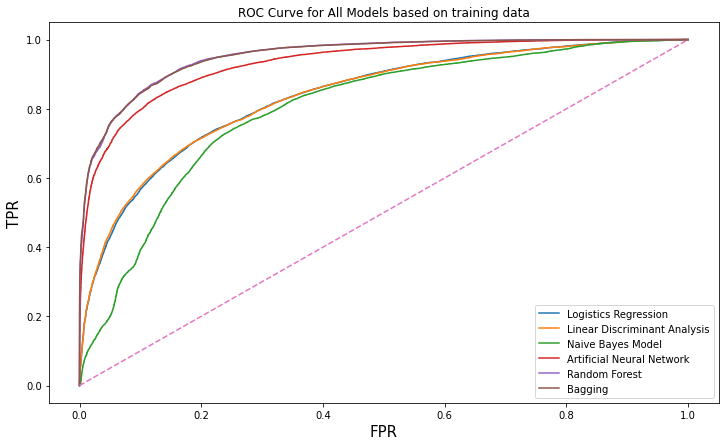

In [108]:
#ROC AUC score for training data
print('Area under the curve (ROC_AUC score) for Logistic Regression Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_lr).round(4))
print('\033[0mArea under the curve (ROC_AUC score) for Linear Discriminant Analysis Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_lda).round(4))
print('\033[0mArea under the curve (ROC_AUC score) for Naive Bayes Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_nb).round(4))
print('\033[0mArea under the curve (ROC_AUC score) for Artificial Neural Network Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_ann).round(4))
print('\033[0mArea under the curve (ROC_AUC score) for Random Forest Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_bmrfc).round(4))
print('\033[0mArea under the curve (ROC_AUC score) for Bagging on Random Forest Model based on training data is\033[1m',roc_auc_score(y_train_sm,y_train_prob_pred_bgg).round(4))
plt.figure(figsize=(12,7))

fpr_lrtrain, tpr_lrtrain, thresholds_lrtrain = roc_curve(y_train_sm, y_train_prob_pred_lr)
plt.plot(fpr_lrtrain, tpr_lrtrain, marker='') 

fpr_ldatrain, tpr_ldatrain, thresholds_ldatrain = roc_curve(y_train_sm, y_train_prob_pred_lda)
plt.plot(fpr_ldatrain, tpr_ldatrain, marker='') 

fpr_nbtrain, tpr_nbtrain, thresholds_nbtrain = roc_curve(y_train_sm, y_train_prob_pred_nb)
plt.plot(fpr_nbtrain, tpr_nbtrain, marker='') 

fpr_anntrain, tpr_anntrain, thresholds_anntrain = roc_curve(y_train_sm, y_train_prob_pred_ann)
plt.plot(fpr_anntrain, tpr_anntrain, marker='') 

fpr_bmrfctrain, tpr_bmrfctrain, thresholds_bmrfctrain = roc_curve(y_train_sm, y_train_prob_pred_bmrfc)
plt.plot(fpr_bmrfctrain, tpr_bmrfctrain, marker='') 

fpr_bggtrain, tpr_bggtrain, thresholds_bggtrain = roc_curve(y_train_sm, y_train_prob_pred_bgg)
plt.plot(fpr_bggtrain, tpr_bggtrain, marker='') 



plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {} based on training data'.format('All Models'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.legend(models_names2.values())
plt.show()

Area under the curve (ROC_AUC score) for Logistic Regression Model based on testing data is 0.711
Area under the curve (ROC_AUC score) for Linear Discriminant Analysis Model based on testing data is 0.712
Area under the curve (ROC_AUC score) for Naive Bayes Model based on testing data is 0.697
Area under the curve (ROC_AUC score) for Artificial Neural Network Model based on testing data is 0.751
Area under the curve (ROC_AUC score) for Random Forest Model based on testing data is 0.767
Area under the curve (ROC_AUC score) for Bagging with Random Forest Model based on testing data is 0.767


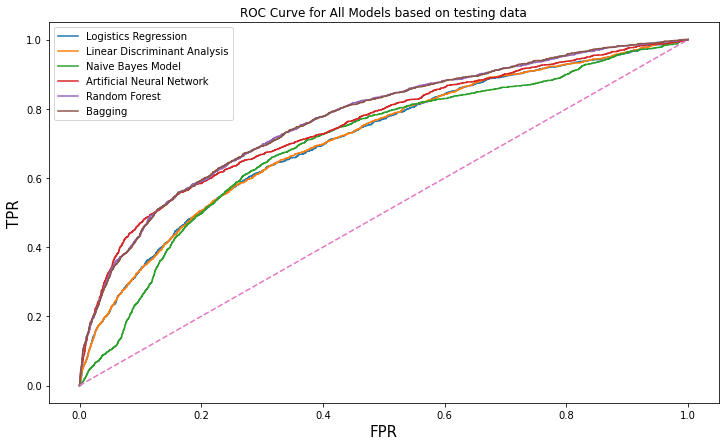

In [109]:
#ROC AUC score for testing data
print('Area under the curve (ROC_AUC score) for Logistic Regression Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_lr).round(3))
print('\033[0mArea under the curve (ROC_AUC score) for Linear Discriminant Analysis Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_lda).round(3))
print('\033[0mArea under the curve (ROC_AUC score) for Naive Bayes Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_nb).round(3))
print('\033[0mArea under the curve (ROC_AUC score) for Artificial Neural Network Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_ann).round(3))
print('\033[0mArea under the curve (ROC_AUC score) for Random Forest Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_bmrfc).round(3))
print('\033[0mArea under the curve (ROC_AUC score) for Bagging with Random Forest Model based on testing data is\033[1m',roc_auc_score(y_test,y_test_prob_pred_bgg).round(3))

plt.figure(figsize=(12,7))

fpr_lrtest, tpr_lrtest, thresholds_lrtest = roc_curve(y_test, y_test_prob_pred_lr)
plt.plot(fpr_lrtest, tpr_lrtest, marker='') 

fpr_ldatest, tpr_ldatest, thresholds_ldatest = roc_curve(y_test, y_test_prob_pred_lda)
plt.plot(fpr_ldatest, tpr_ldatest, marker='') 

fpr_nbtest, tpr_nbtest, thresholds_nbtest = roc_curve(y_test, y_test_prob_pred_nb)
plt.plot(fpr_nbtest, tpr_nbtest, marker='',) 

fpr_anntest, tpr_anntest, thresholds_anntest = roc_curve(y_test, y_test_prob_pred_ann)
plt.plot(fpr_anntest, tpr_anntest, marker='',) 

fpr_bmrfctest, tpr_bmrfctest, thresholds_bmrfctest = roc_curve(y_test, y_test_prob_pred_bmrfc)
plt.plot(fpr_bmrfctest, tpr_bmrfctest, marker='',) 

fpr_bggtest, tpr_bggtest, thresholds_bggtest = roc_curve(y_test, y_test_prob_pred_bgg)
plt.plot(fpr_bggtest, tpr_bggtest, marker='',) 
  
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {} based on testing data'.format('All Models'))
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)
plt.legend(models_names2.values())
plt.show()